# 2조 머신러닝 조별 과제

- 유기견 입양에 영향을 끼치는 다양한 변수 분석
- EDA로 변수를 시각화하여 데이터를 탐색한 후 다양한 머신러닝 분류 모델을 사용하여 정확도 비교

# 1. 데이터 분석 준비

## 1-1) 환경설정

In [1]:
# 페키지 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# 폰트 오류 해결
import platform
platform.system()
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [3]:
# 행 개수 조정
pd.set_option('display.max_row', 400)

# 열 개수 조정
pd.set_option('display.max_columns', 200)

## 1-2) 데이터 불러오기
- 원본 데이터 보관
- csv로 변환

In [4]:
df = pd.read_csv("./data/유기동물보호현황.csv", engine='python', encoding='CP949')
df

,시군명,접수일자,발견장소,상태,공고고유번호,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,특징,보호소명,보호소전화번호,보호소도로명주소,보호소지번주소,보호소우편번호,관할기관,특이사항,이미지경로,썸네일이미지경로,WGS84위도,WGS84경도
0,남양주시,20210704,진건파출소,보호중,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
1,남양주시,20210704,다산동,보호중,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
2,군포시,20210703,군포소방서에서 인수,종료(반환),경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,031-296-0124,경기도 안산시 상록구 청곡길 50,경기도 안산시 상록구 부곡동 231-5번지,15301,경기도 군포시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.340254,126.870005
3,안산시,20210703,월피동 489-18 부근,보호중,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
4,안산시,20210703,삼일로497 단지 내 도로,보호중,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428


In [5]:
df_korean_original = df[df.columns]

In [6]:
df_korean_original.to_csv("./data/data_original.csv", encoding="utf-8-sig")

## 1-3) 데이터 가시성 확보

### column 이름 영어로 변경
- 정의 <br> city : 발견 도시 <br> received_date: 접수 날짜 <br> found_place: 발견 장소 <br> status: 입양 여부 <br> announcement_id: 공고 번호 <br> announcement_start_date: 공고 시작 날짜 <br> announcement_end_date: 공고 종료 날짜 <br> breed: 품종 <br> color: 색상 <br> age: 나이 <br> weight: 몸무게 <br> sex: 성별 <br> is_neutered: 중성화 여부 <br> characteristic: 특징 <br> shelter_name: 보호소 이름 <br> shelter_phone_number: 보호소 연락처 <br> shelter_street_name_address: 보호소 도로명 주소 <br> shelter_address: 보호소 주소 <br> shelter_zip_code: 보호소 우편 번호 <br> jurisdiction_city: 행정구역 <br> uniqueness: 특이사항 <br> image_path: 이미지 주소 <br> thumbnail_image_path: 썸네일 주소 <br> WGS84_latitude: 위도 <br> WGS84_longitude: 경도

- 원본 데이터 보관
- csv로 변환

In [7]:
df.columns = ['city', 'received_date', 'found_place', 'status', 'announcement_id',
              'announcement_start_date', 'announcement_end_date', 'breed', 'color',
              'age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
              'shelter_phone_number', 'shelter_street_name_address',
              'shelter_address', 'shelter_zip_code', 'jurisdiction_city',
              'uniqueness', 'image_path', 'thumbnail_image_path', 'WGS84_latitude',
              'WGS84_longitude']
df

,city,received_date,found_place,status,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,shelter_phone_number,shelter_street_name_address,shelter_address,shelter_zip_code,jurisdiction_city,uniqueness,image_path,thumbnail_image_path,WGS84_latitude,WGS84_longitude
0,남양주시,20210704,진건파출소,보호중,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
1,남양주시,20210704,다산동,보호중,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,031-591-7270,경기도 남양주시 금곡로 44,경기도 남양주시 금곡동 427-28번지 성원빌딩 1층,12237,경기도 남양주시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.633902,127.207918
2,군포시,20210703,군포소방서에서 인수,종료(반환),경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,031-296-0124,경기도 안산시 상록구 청곡길 50,경기도 안산시 상록구 부곡동 231-5번지,15301,경기도 군포시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.340254,126.870005
3,안산시,20210703,월피동 489-18 부근,보호중,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
4,안산시,20210703,삼일로497 단지 내 도로,보호중,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,031-410-3777,경기도 안산시 단원구 한양대학로 208,경기도 안산시 단원구 고잔동 730-3번지 2층 스타캣츠,15466,경기도 안산시,NaN,http://www.animal.go.kr/files/shelter/2021/06/...,http://www.animal.go.kr/files/shelter/2021/06/...,37.313581,126.836756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,종료(자연사),경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,031-356-2281,경기도 화성시 남양읍 화성로 1483-27,경기도 화성시 남양읍 북양리 12-2번지,18254,경기도 화성시,NaN,http://www.animal.go.kr/files/shelter/2020/11/...,http://www.animal.go.kr/files/shelter/2020/11/...,37.224949,126.843428


In [8]:
df_original = df[df.columns]

In [9]:
df_original.to_csv("./data/data.csv", encoding="utf-8-sig")

### 분석에서 사용할 수 없는 데이터 삭제
- shelter_phone_number(보호소전화번호)   
- shelter_street_name_address(보호소도로명주소)   
- shelter_address(보호소지번주소)   
- shelter_zip_code(보호소우편번호)   
- image_path(이미지경로)   
- thumbnail_image_path(썸네일이미지경로)

In [10]:
df = df[
    ['city', 'received_date', 'found_place', 'announcement_id',
     'announcement_start_date', 'announcement_end_date', 'breed', 'color',
     'age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
     'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status']
]
df

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,20210704,진건파출소,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,20210704,다산동,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,20210703,군포소방서에서 인수,경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,20210703,월피동 489-18 부근,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,20210703,삼일로497 단지 내 도로,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


# 2. EDA & FE 1 : 기본적인 데이터 전처리
- 데이터 값 확인
- 오타 수정/문자열 삭제/단위 통일/데이터 형식 변경 등

In [11]:
df

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,20210704,진건파출소,경기-남양주-2021-00878,20210704,20210714,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,20210704,다산동,경기-남양주-2021-00879,20210704,20210714,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,20210703,군포소방서에서 인수,경기-군포-2021-00066,20210703,20210715,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,20210703,월피동 489-18 부근,경기-안산-2021-00690,20210703,20210715,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,20210703,삼일로497 단지 내 도로,경기-안산-2021-00691,20210703,20210715,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00019,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00018,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00016,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,20210105,마도면 청원리 304-1 세진메탈,경기-화성-2021-00015,20210105,20210114,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     11536 non-null  object 
 1   received_date            11536 non-null  int64  
 2   found_place              11536 non-null  object 
 3   announcement_id          11536 non-null  object 
 4   announcement_start_date  11536 non-null  int64  
 5   announcement_end_date    11536 non-null  int64  
 6   breed                    11536 non-null  object 
 7   color                    11536 non-null  object 
 8   age                      11536 non-null  object 
 9   weight                   11536 non-null  object 
 10  sex                      11536 non-null  object 
 11  is_neutered              11536 non-null  object 
 12  characteristic           11536 non-null  object 
 13  shelter_name             11536 non-null  object 
 14  jurisdiction_city     

## 2-1) 날짜(date) 형식 변경
- received_date/announcement_start_date/announcement_end_date
- yymmdd("object")를 yyyy-mm-dd("datetime")으로 수정

In [13]:
df[["received_date", "announcement_start_date", "announcement_end_date"]]

,received_date,announcement_start_date,announcement_end_date
0,20210704,20210704,20210714
1,20210704,20210704,20210714
2,20210703,20210703,20210715
3,20210703,20210703,20210715
4,20210703,20210703,20210715
...,...,...,...
11531,20210105,20210105,20210114
11532,20210105,20210105,20210114
11533,20210105,20210105,20210114
11534,20210105,20210105,20210114


In [14]:
df[["received_date", "announcement_start_date", "announcement_end_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   received_date            11536 non-null  int64
 1   announcement_start_date  11536 non-null  int64
 2   announcement_end_date    11536 non-null  int64
dtypes: int64(3)
memory usage: 270.5 KB


In [15]:
df["received_date"] = pd.to_datetime(df["received_date"].astype('str'))
df["announcement_start_date"] = pd.to_datetime(df["announcement_start_date"].astype('str'))
df["announcement_end_date"] = pd.to_datetime(df["announcement_end_date"].astype('str'))

df[["received_date", "announcement_start_date", "announcement_end_date"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11536 entries, 0 to 11535
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   received_date            11536 non-null  datetime64[ns]
 1   announcement_start_date  11536 non-null  datetime64[ns]
 2   announcement_end_date    11536 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 270.5 KB


In [16]:
df

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,2021-07-04,진건파출소,경기-남양주-2021-00878,2021-07-04,2021-07-14,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,2021-07-04,다산동,경기-남양주-2021-00879,2021-07-04,2021-07-14,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,2021-07-03,군포소방서에서 인수,경기-군포-2021-00066,2021-07-03,2021-07-15,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,2021-07-03,월피동 489-18 부근,경기-안산-2021-00690,2021-07-03,2021-07-15,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,2021-07-03,삼일로497 단지 내 도로,경기-안산-2021-00691,2021-07-03,2021-07-15,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00019,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00018,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00016,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,경기-화성-2021-00015,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


## 2-2) announcement_id(공고고유번호) 삭제
- index에 중복된 데이터가 없으므로 삭제

In [17]:
df["announcement_id"]

0        경기-남양주-2021-00878
1        경기-남양주-2021-00879
2         경기-군포-2021-00066
3         경기-안산-2021-00690
4         경기-안산-2021-00691
               ...        
11531     경기-화성-2021-00019
11532     경기-화성-2021-00018
11533     경기-화성-2021-00016
11534     경기-화성-2021-00015
11535     경기-화성-2021-00014
Name: announcement_id, Length: 11536, dtype: object

In [18]:
df[df["announcement_id"].duplicated()]

,city,received_date,found_place,announcement_id,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status


In [19]:
df.drop(["announcement_id"], axis = 1, inplace = True)
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,2021-07-04,진건파출소,2021-07-04,2021-07-14,[개] 믹스견,흰색,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
1,남양주시,2021-07-04,다산동,2021-07-04,2021-07-14,[고양이] 한국 고양이,흑백,2021(년생),0.55(Kg),F,N,호흡기질환,남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
2,군포시,2021-07-03,군포소방서에서 인수,2021-07-03,2021-07-15,[개] 비글,백갈흑,2015(년생),15(Kg),M,Y,칩있음(대한이),한국야생동물보호협회,경기도 군포시,NaN,37.340254,126.870005,종료(반환)
3,안산시,2021-07-03,월피동 489-18 부근,2021-07-03,2021-07-15,[고양이] 한국 고양이,흰바탕삼색,2021(년생),0.4(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
4,안산시,2021-07-03,삼일로497 단지 내 도로,2021-07-03,2021-07-15,[고양이] 한국 고양이,노란줄무늬,2021(년생),0.29(Kg),F,N,"눈꼽,콧물 심함. 많이 말랐음. 비틀거림. 식욕부진",스타캣츠,경기도 안산시,NaN,37.313581,126.836756,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,[개] 믹스견,흰색,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


## 2-3) breed(품종) 분류하기
- species, breed
- '개'가 들어간 row만 추출 ('species' == '개' )
- 결과 값의 breed만 표시

In [20]:
df["species"] = df.breed.str.split(' ').str[0]
df["species"] = df["species"].str.replace(pat=r'[^\w]', repl=r'', regex=True)
df["species"].value_counts()

개       8716
고양이     2613
기타축종     207
Name: species, dtype: int64

In [21]:
df=df.loc[df['species'] == '개']
df["species"].value_counts()

개    8716
Name: species, dtype: int64

In [22]:
df.drop(["species"], axis = 1, inplace = True)
df['breed'] = df['breed'].str[4:]
df["breed"].value_counts()

믹스견               6345
말티즈                356
푸들                 307
진도견                166
포메라니안              151
시츄                 110
라브라도 리트리버          100
치와와                 86
웰시 코기 펨브로크          85
요크셔 테리어             75
골든 리트리버             71
스피츠                 70
시베리안 허스키            52
시바                  51
프렌치 불독              48
풍산견                 47
비숑 프리제              46
보더 콜리               45
코카 스파니엘             36
닥스훈트                32
도사                  25
미니어쳐 핀셔             25
보스턴 테리어             25
사모예드                24
셰퍼드                 23
비글                  22
슈나우져                20
불독                  19
미디엄 푸들              15
알라스칸 말라뮤트           15
말라뮤트                13
포인터                 13
차우차우                12
삽살개                 11
퍼그                  10
토이 푸들               10
샤페이                 10
페키니즈                 9
셔틀랜드 쉽독              7
올드 잉글리쉬 쉽독           6
도베르만                 6
캐벌리어 킹 찰스 스파니엘       5
그레이트 피레니즈            5
이탈리안 그레이 하운

## 2-4) color(색상) 분류하기
- white / yellow / brown / black / mix(혼합)로 상위 5개 색상 선정
- 최대한 근접한 색상으로 데이터 분류
- 식별 불가능하거나 데이터 수가 너무 적은 값 삭제 ('color'=='others')

In [23]:
df["color"].value_counts()

흰색           1703
갈색           1051
갈/흰           389
흰             347
백             330
             ... 
훅               1
백검갈             1
흰황색             1
초코/하양           1
노랑색.흰색.검정       1
Name: color, Length: 529, dtype: int64

In [24]:
white = ["흰색", "흰", "백", "하양", "크림색", "백색", "크림", "검백색", "갈백색", "검백"]
yellow = ["황색", "살구색", "베이지"]
brown = ["갈색","갈", "검갈색", "연갈색", "흑갈", "흰갈", "연갈", "흑갈색", "회갈색", "검갈", "검황색", "백갈색"]
black = ["검정", "검정색", "갈흑", "검", "흑", "검은색", "백흑"]
mix = ["갈/흰", "갈/검/흰", "검/흰", "갈백", "백갈", "갈/검", "흰/갈", "검/갈", "흑백",
          "검/갈/흰", "호피무늬", "갈색/하양", "검정/하양", "흰색,검정", "갈색,검정", 
          "연갈/흰", "갈흑백", "블랙탄", "흑갈백", "흰색,갈색", "검정,흰색", "삼색", 
          "검정색, 흰색", "검정.흰색", "흰/연갈", "갈색,흰색",
          "흰,갈색", "검정,갈색", "흰,갈", "흰색, 갈색", "갈백흑"]

color_list = []
for color in df["color"] :
    if color in white :
        color_list.append("white")
    elif color in yellow :
        color_list.append("yellow")
    elif color in brown :
        color_list.append("brown")
    elif color in black :
        color_list.append("black")
    elif color in mix :
        color_list.append("mix")
    else :
        color_list.append("others")
        
print(len(color_list))

df["color"] = color_list

8716


In [25]:
df["color"].value_counts()

white     2890
mix       1946
brown     1633
others    1398
black      586
yellow     263
Name: color, dtype: int64

In [26]:
df = df[df.color != "others"]
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,남양주시,2021-07-04,진건파출소,2021-07-04,2021-07-14,믹스견,white,2016(년생),3.50(Kg),M,Y,"말티즈,푸들 믹스견 , 순함",남양주동물보호협회,경기도 남양주시,NaN,37.633902,127.207918,보호중
6,부천시,2021-07-03,원미초등학교,2021-07-03,2021-07-13,비숑 프리제,white,2018(년생),5.3(Kg),M,Y,순하고 사람을 잘 따름,가야동물병원,경기도 부천시,NaN,37.490598,126.783883,종료(반환)
8,부천시,2021-07-03,괴안동 119 안전센타 앞,2021-07-03,2021-07-13,시바,mix,2019(년생),10(Kg),M,N,내장칩 확인. 보호자 연락중,가야동물병원,경기도 부천시,NaN,37.490598,126.783883,종료(반환)
9,부천시,2021-07-03,다이소 범박동점,2021-07-03,2021-07-13,포메라니안,white,2012(년생),3.5(Kg),M,Y,"중성화O,치아몇개없음,순하고착함",24시아이동물메디컬,경기도 부천시,NaN,37.525666,126.804553,종료(반환)
15,여주시,2021-07-03,가남읍 상활리,2021-07-03,2021-07-13,믹스견,white,2021(년생),1.70(Kg),F,N,"피부질환, 겁이 많음",위더스 동물보호센터,경기도 여주시,NaN,37.297234,127.575935,보호중
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,2021(년생),1(Kg),M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,종료(자연사)


## 2-5) age 컬럼 생성
- born_year, age
- 한국식 세는 나이 기준 (공고시작날짜의 연도 - 태어난 연도 + 1)
- born_year와 age의 동일한 상관관계 확인 후 born_year 삭제

In [27]:
df['born_year'] = df['age'].str.rstrip("(년생)")
df['born_year']
df['born_year'] = pd.to_numeric(df['born_year'])
df['born_year']

0        2016
6        2018
8        2019
9        2012
15       2021
         ... 
11531    2021
11532    2021
11533    2021
11534    2021
11535    2021
Name: born_year, Length: 7318, dtype: int64

In [28]:
df['age'] = df['announcement_start_date'].dt.year - df['born_year'] + 1
df['age']

0         6
6         4
8         3
9        10
15        1
         ..
11531     1
11532     1
11533     1
11534     1
11535     1
Name: age, Length: 7318, dtype: int64

In [29]:
df[['age', "born_year"]].corr()

,age,born_year
age,1.0,-1.0
born_year,-1.0,1.0


In [30]:
print(df.columns)

Index(['city', 'received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status',
       'born_year'],
      dtype='object')


In [31]:
df.drop(["born_year"], axis = 1, inplace = True)
print(df.columns)

Index(['city', 'received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')


## 2-6) weight(무게) 값 수정
- 문자열("kg") 삭제
- float 형식(자료형)으로 변경

In [32]:
df['weight']=df.weight.str.split('(').str[0]
df['weight']

0        3.50
6         5.3
8          10
9         3.5
15       1.70
         ... 
11531       1
11532       1
11533       1
11534       1
11535       1
Name: weight, Length: 7318, dtype: object

In [33]:
df["weight"][~df.applymap(np.isreal).all(1)]

0        3.50
6         5.3
8          10
9         3.5
15       1.70
         ... 
11531       1
11532       1
11533       1
11534       1
11535       1
Name: weight, Length: 7318, dtype: object

In [34]:
df[pd.to_numeric(df['weight'], errors='coerce').isnull()]["weight"]

4345    4..00
5135     7,50
Name: weight, dtype: object

In [35]:
df.loc[df.weight == '4..00', 'weight'] ='4.0'
df.loc[df.weight == '7,50', 'weight'] ='7.5'
# df.loc[df.weight == '30-', 'weight'] ='30'

In [36]:
df['weight'] = df['weight'].astype(float)
df['weight']

0         3.5
6         5.3
8        10.0
9         3.5
15        1.7
         ... 
11531     1.0
11532     1.0
11533     1.0
11534     1.0
11535     1.0
Name: weight, Length: 7318, dtype: float64

## 2-7) status(입양 여부) 정의하기
- 용어 확인

    -종료(반환) : 소유주 혹은 원주인에게 인도 <br>
    -종료(기증) : 입양되거나 관련 기관에서 임시 보호 중 <br>
    -종료(방사): 치료 및 tnr 시행 후 방사

- 분석에 필요하지 않은 row 삭제
- 안락사/자연사=0(실패)와 입양=1(성공)으로 값 변경

In [37]:
df["status"].value_counts()

종료(입양)     1927
종료(안락사)    1777
종료(반환)     1243
보호중        1161
종료(자연사)     875
종료(기증)      335
Name: status, dtype: int64

In [38]:
df = df[(df['status'] != "보호중") & (df['status'] != "종료(반환)") & (df['status'] != "종료(기증)") & (df['status'] != "종료(방사)")]
df["status"].value_counts()

종료(입양)     1927
종료(안락사)    1777
종료(자연사)     875
Name: status, dtype: int64

In [39]:
df.loc[(df.status == '종료(안락사)'), 'status'] = "0"
df.loc[(df.status == '종료(자연사)'), 'status'] = "0"
df.loc[(df.status == '종료(입양)'), 'status'] = "1"
df.status = df.status.astype(int)
df["status"].value_counts()

0    2652
1    1927
Name: status, dtype: int64

## 2-8) EDA & FE 1 마무리 및 DF 재생성
- 데이터 저장
- row 정렬 (target 변수인 'status'를 맨 뒤로)
- index 정렬

In [40]:
df_EDA_1 = df[df.columns]

In [41]:
df.columns

Index(['city', 'received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')

In [42]:
df = df[['city', 'received_date', 'found_place', 'announcement_start_date',
         'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
         'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
         'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status']]
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
77,안양시,2021-07-02,안양동 1336-1 부근,2021-07-02,2021-07-12,믹스견,white,1,4.00,M,N,2개월추정. 개울에빠져있었음. 입소시자연사.,한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
81,시흥시,2021-07-01,신천동 산18-2 부근,2021-07-01,2021-07-13,믹스견,mix,6,12.00,F,U,"젖불음,진드기있음,파란목줄,입소시자연사",한국야생동물보호협회,경기도 시흥시,NaN,37.340254,126.870005,0
559,용인시,2021-06-25,처인구 원삼면 원양로279-17,2021-06-25,2021-07-05,믹스견,brown,3,4.65,M,N,"후지마비,구더기 중감염,상태안좋음",용인시 동물보호센터,경기도 용인시,NaN,37.243315,127.159326,0
801,안양시,2021-06-22,장내로100번길23-1 부근,2021-06-22,2021-07-04,믹스견,black,1,4.50,M,N,"피부병심함,순함",한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
828,파주시,2021-06-22,부대 관사,2021-06-22,2021-07-02,믹스견,brown,1,5.80,M,N,"진드기감염,전시피부염,상태불량",버디종합동물병원,경기도 파주시,NaN,37.853155,126.786881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11531,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
11532,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
11533,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
11534,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0


In [43]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,안양시,2021-07-02,안양동 1336-1 부근,2021-07-02,2021-07-12,믹스견,white,1,4.00,M,N,2개월추정. 개울에빠져있었음. 입소시자연사.,한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
1,시흥시,2021-07-01,신천동 산18-2 부근,2021-07-01,2021-07-13,믹스견,mix,6,12.00,F,U,"젖불음,진드기있음,파란목줄,입소시자연사",한국야생동물보호협회,경기도 시흥시,NaN,37.340254,126.870005,0
2,용인시,2021-06-25,처인구 원삼면 원양로279-17,2021-06-25,2021-07-05,믹스견,brown,3,4.65,M,N,"후지마비,구더기 중감염,상태안좋음",용인시 동물보호센터,경기도 용인시,NaN,37.243315,127.159326,0
3,안양시,2021-06-22,장내로100번길23-1 부근,2021-06-22,2021-07-04,믹스견,black,1,4.50,M,N,"피부병심함,순함",한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
4,파주시,2021-06-22,부대 관사,2021-06-22,2021-07-02,믹스견,brown,1,5.80,M,N,"진드기감염,전시피부염,상태불량",버디종합동물병원,경기도 파주시,NaN,37.853155,126.786881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4575,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4576,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4577,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0


# 3. EDA & FE 2 : 구체적인 탐색과 수정
- culumn을 다양하게 시각화하여 탐색적 데이터 분석 수행
- 이를 기반으로 column별 특성이 더 잘 드러날 수 있도록 데이터 수정

## 전체 column 확인
- 핵심 column인 'status(입양 상태)' 현황

In [44]:
df

,city,received_date,found_place,announcement_start_date,announcement_end_date,breed,color,age,weight,sex,is_neutered,characteristic,shelter_name,jurisdiction_city,uniqueness,WGS84_latitude,WGS84_longitude,status
0,안양시,2021-07-02,안양동 1336-1 부근,2021-07-02,2021-07-12,믹스견,white,1,4.00,M,N,2개월추정. 개울에빠져있었음. 입소시자연사.,한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
1,시흥시,2021-07-01,신천동 산18-2 부근,2021-07-01,2021-07-13,믹스견,mix,6,12.00,F,U,"젖불음,진드기있음,파란목줄,입소시자연사",한국야생동물보호협회,경기도 시흥시,NaN,37.340254,126.870005,0
2,용인시,2021-06-25,처인구 원삼면 원양로279-17,2021-06-25,2021-07-05,믹스견,brown,3,4.65,M,N,"후지마비,구더기 중감염,상태안좋음",용인시 동물보호센터,경기도 용인시,NaN,37.243315,127.159326,0
3,안양시,2021-06-22,장내로100번길23-1 부근,2021-06-22,2021-07-04,믹스견,black,1,4.50,M,N,"피부병심함,순함",한국야생동물보호협회,경기도 안양시,NaN,37.340254,126.870005,0
4,파주시,2021-06-22,부대 관사,2021-06-22,2021-07-02,믹스견,brown,1,5.80,M,N,"진드기감염,전시피부염,상태불량",버디종합동물병원,경기도 파주시,NaN,37.853155,126.786881,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4575,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4576,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0
4577,화성시,2021-01-05,마도면 청원리 304-1 세진메탈,2021-01-05,2021-01-14,믹스견,white,1,1.00,M,N,귀엽다,남양유기견보호센터,경기도 화성시,NaN,37.224949,126.843428,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4579 entries, 0 to 4578
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     4579 non-null   object        
 1   received_date            4579 non-null   datetime64[ns]
 2   found_place              4579 non-null   object        
 3   announcement_start_date  4579 non-null   datetime64[ns]
 4   announcement_end_date    4579 non-null   datetime64[ns]
 5   breed                    4579 non-null   object        
 6   color                    4579 non-null   object        
 7   age                      4579 non-null   int64         
 8   weight                   4579 non-null   float64       
 9   sex                      4579 non-null   object        
 10  is_neutered              4579 non-null   object        
 11  characteristic           4579 non-null   object        
 12  shelter_name             4579 non-

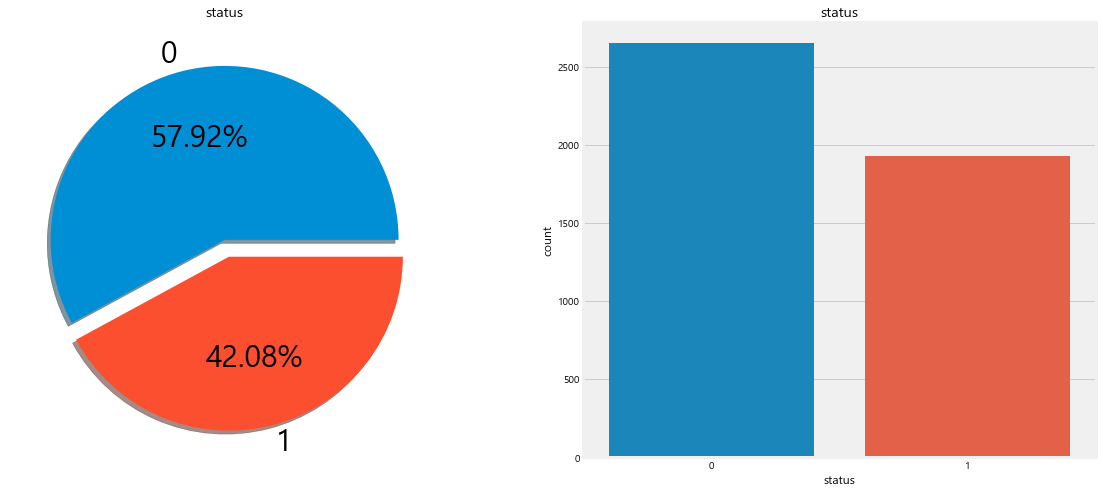

In [46]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df['status'].value_counts().plot.pie(explode = [0, 0.1],
                                     autopct = '%1.2f%%', 
                                     ax = ax[0], 
                                     shadow = True, 
                                     textprops = {'fontsize': 30})
ax[0].set_title('status')
ax[0].set_ylabel('')
sns.countplot('status', data = df, ax = ax[1])
ax[1].set_title('status')
plt.show()

## 3-1) city (발견 도시)

In [47]:
df[["city"]]

,city
0,안양시
1,시흥시
2,용인시
3,안양시
4,파주시
...,...
4574,화성시
4575,화성시
4576,화성시
4577,화성시


### (1) countplot

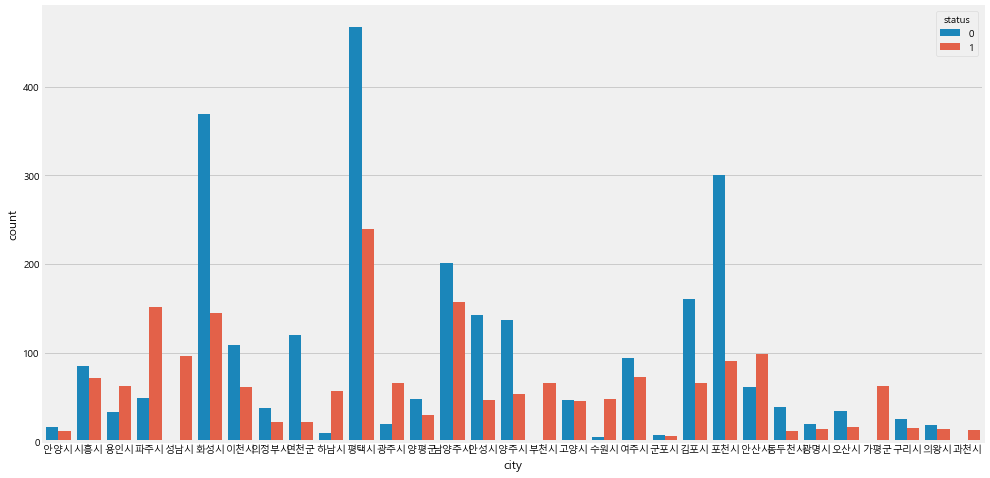

In [48]:
plt.figure(figsize = (15,8))

sns.countplot(x = "city", hue = "status", data = df)
plt.show()

입양 실패가 월등히 높은 도시는 화성/평택/남양주/김포/포천 <br>
입양 성공이 가장 높은 도시는 평택

In [49]:
df[["city"]].value_counts()

city
평택시     706
화성시     514
포천시     391
남양주시    358
김포시     226
파주시     200
양주시     190
안성시     188
이천시     169
여주시     166
안산시     159
시흥시     156
연천군     142
성남시      96
용인시      95
고양시      92
광주시      85
양평군      78
부천시      67
하남시      66
가평군      62
의정부시     60
수원시      53
오산시      50
동두천시     50
구리시      40
광명시      33
의왕시      32
안양시      28
과천시      14
군포시      13
dtype: int64

평택/화성/포천은 유기견 구조 수로 상위 3개 도시 <br>
따라서 이 도시들이 입양 성공 및 실패가 많았던 이유는 전체 데이터 수가 많아서일 가능성 존재

### (2) 도시별 입양 성공, 실패 및 그 비율 확인

In [50]:
df_city = df[["city"]]
df_city = df_city.drop_duplicates()
df_city.reset_index(inplace = True)
df_city.drop(["index"], axis = 1, inplace = True)
df_city["success"] = 0
df_city["fail"] = 0


for i in df.index :
    for j in df_city.index :
        if df.loc[i]["city"] == df_city.loc[j]["city"] :
            if df.loc[i]["status"] == 1 :
                df_city.at[j,"success"] = df_city.loc[j]["success"] + 1
            else :
                df_city.at[j,"fail"] = df_city.loc[j]["fail"] + 1

                
df_city["total"] = df_city["success"] + df_city["fail"]
df_city["success_ratio"] = df_city["success"]/df_city["total"]

df_city

,city,success,fail,total,success_ratio
0,안양시,12,16,28,0.428571
1,시흥시,71,85,156,0.455128
2,용인시,62,33,95,0.652632
3,파주시,151,49,200,0.755000
4,성남시,96,0,96,1.000000
5,화성시,145,369,514,0.282101
6,이천시,61,108,169,0.360947
7,의정부시,22,38,60,0.366667
8,연천군,22,120,142,0.154930
9,하남시,57,9,66,0.863636


In [51]:
df_city.sort_values(by=['success_ratio'], ascending=[False]).head(10)

,city,success,fail,total,success_ratio
4,성남시,96,0,96,1.000000
27,가평군,62,0,62,1.000000
16,부천시,66,1,67,0.985075
30,과천시,13,1,14,0.928571
18,수원시,48,5,53,0.905660
9,하남시,57,9,66,0.863636
11,광주시,66,19,85,0.776471
3,파주시,151,49,200,0.755000
2,용인시,62,33,95,0.652632
23,안산시,98,61,159,0.616352


In [52]:
df_city.sort_values(by=['total'], ascending=[False]).head(10)

,city,success,fail,total,success_ratio
10,평택시,239,467,706,0.338527
5,화성시,145,369,514,0.282101
22,포천시,91,300,391,0.232737
13,남양주시,157,201,358,0.438547
21,김포시,66,160,226,0.292035
3,파주시,151,49,200,0.755000
15,양주시,53,137,190,0.278947
14,안성시,46,142,188,0.244681
6,이천시,61,108,169,0.360947
19,여주시,72,94,166,0.433735


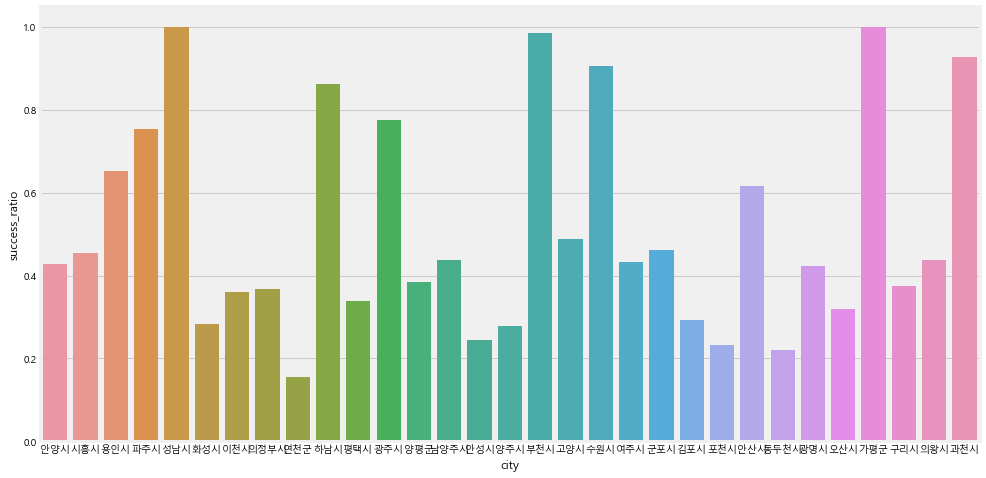

In [53]:
plt.figure(figsize = (15,8))
sns.barplot(x = "city", y = "success_ratio", data = df_city)

plt.show()

일반적으로 유기견이 구조된 도시는 입양 성공에 영향을 미치지 못함 <br>

### (3) city 컬럼 삭제

In [54]:
df.drop(["city"], axis = 1, inplace = True)

In [55]:
print(df.columns)
print(len(df))

Index(['received_date', 'found_place', 'announcement_start_date',
       'announcement_end_date', 'breed', 'color', 'age', 'weight', 'sex',
       'is_neutered', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')
4579


## 3-2) date (날짜)
- received_date (접수 날짜)     
- announcement_start_date (공고 시작 날짜)     
- announcement_end_date (공고 종료 날짜) 

In [56]:
df_date = df[['received_date', 'announcement_start_date', 'announcement_end_date', 'status']]
df_date

,received_date,announcement_start_date,announcement_end_date,status
0,2021-07-02,2021-07-02,2021-07-12,0
1,2021-07-01,2021-07-01,2021-07-13,0
2,2021-06-25,2021-06-25,2021-07-05,0
3,2021-06-22,2021-06-22,2021-07-04,0
4,2021-06-22,2021-06-22,2021-07-02,0
...,...,...,...,...
4574,2021-01-05,2021-01-05,2021-01-14,0
4575,2021-01-05,2021-01-05,2021-01-14,0
4576,2021-01-05,2021-01-05,2021-01-14,0
4577,2021-01-05,2021-01-05,2021-01-14,0


### 3-2) 1. received_date (접수 날짜)

In [57]:
df_date['received_date'].value_counts()

2021-03-08    89
2021-01-05    83
2021-03-02    79
2021-02-15    68
2021-02-23    68
2021-02-05    54
2021-02-22    54
2021-02-09    54
2021-04-30    54
2021-02-24    52
2021-01-21    51
2021-02-25    51
2021-05-27    50
2021-03-19    49
2021-03-26    49
2021-04-19    49
2021-03-11    49
2021-03-12    49
2021-02-01    48
2021-04-09    48
2021-03-15    47
2021-04-20    45
2021-02-26    45
2021-01-26    45
2021-05-18    45
2021-03-10    44
2021-03-23    44
2021-05-03    44
2021-03-03    43
2021-01-25    43
2021-01-13    43
2021-05-07    42
2021-03-29    42
2021-05-31    42
2021-01-18    41
2021-02-02    40
2021-03-04    40
2021-01-08    39
2021-01-23    39
2021-04-13    39
2021-03-27    38
2021-03-05    38
2021-01-27    38
2021-01-12    38
2021-03-24    37
2021-02-19    37
2021-03-16    36
2021-02-27    36
2021-05-24    36
2021-02-17    36
2021-06-02    35
2021-04-05    35
2021-03-30    35
2021-05-17    35
2021-05-13    35
2021-04-15    34
2021-02-10    33
2021-03-31    33
2021-04-29    

### (1) kdeplot

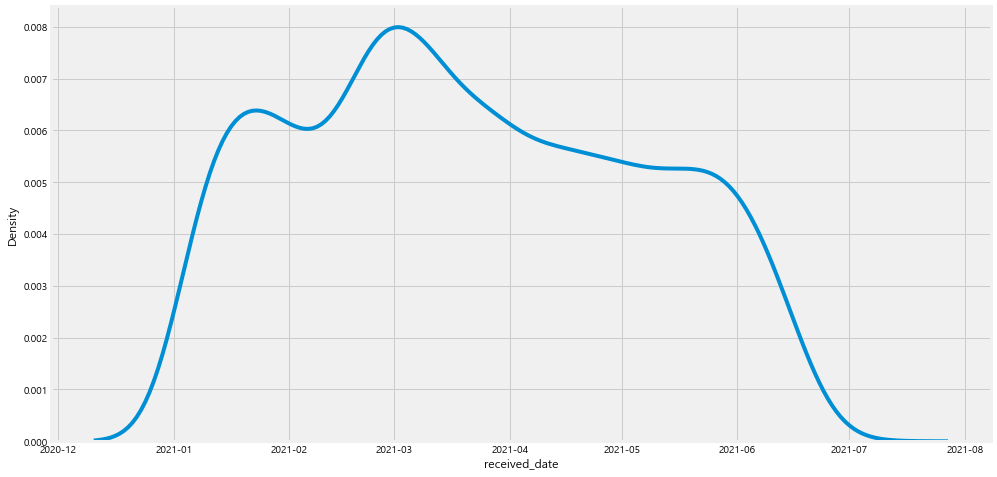

In [58]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='received_date')
plt.show()

### (2) kdeplot (hue = status)

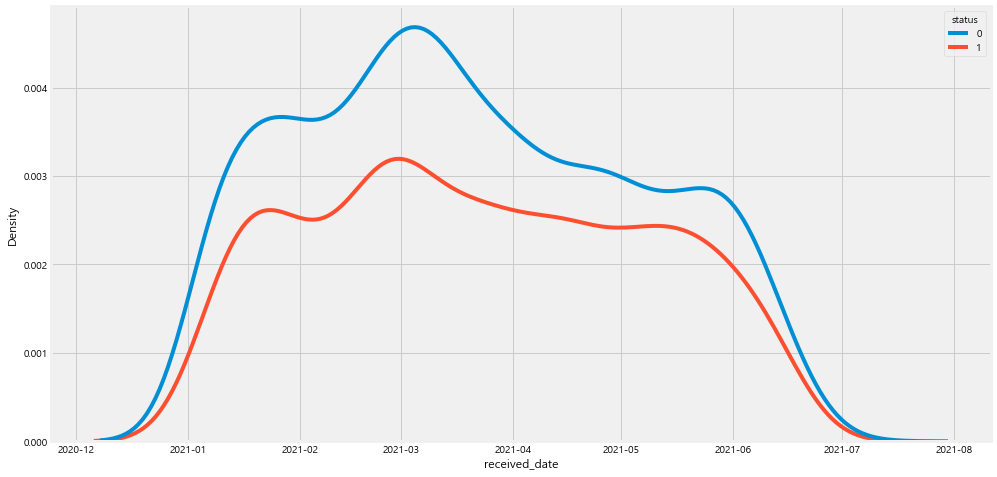

In [59]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='received_date', hue='status')
plt.show()

### (3) catplot

<Figure size 1080x576 with 0 Axes>

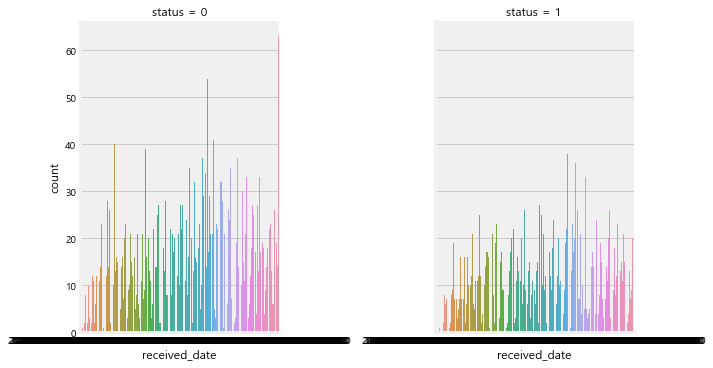

In [60]:
plt.figure(figsize = (15,8))
g = sns.catplot(data=df_date, x="received_date", col="status", kind="count")
plt.show()

### 3-2) 2. announcement_start_date (공고 시작 날짜)

In [61]:
df_date['announcement_start_date'].value_counts()

2021-03-15    102
2021-03-08     92
2021-02-15     81
2021-03-02     80
2021-02-23     66
2021-01-25     66
2021-03-05     64
2021-02-05     63
2021-03-19     60
2021-01-05     55
2021-04-20     53
2021-02-25     52
2021-05-27     52
2021-02-01     50
2021-02-22     49
2021-02-24     48
2021-03-29     47
2021-01-08     47
2021-05-03     46
2021-02-19     46
2021-01-26     45
2021-03-26     45
2021-06-03     45
2021-01-15     45
2021-03-09     44
2021-05-31     44
2021-01-18     44
2021-02-02     43
2021-04-09     43
2021-04-29     43
2021-05-10     42
2021-02-16     41
2021-03-24     41
2021-05-18     41
2021-02-10     41
2021-05-12     40
2021-03-22     40
2021-05-20     40
2021-03-03     40
2021-03-27     39
2021-04-16     39
2021-05-13     38
2021-04-30     38
2021-03-12     37
2021-01-28     37
2021-05-04     37
2021-04-07     36
2021-03-11     36
2021-02-26     36
2021-01-12     36
2021-04-19     36
2021-02-09     35
2021-02-08     35
2021-06-07     34
2021-05-25     34
2021-03-23

### (1) kdeplot

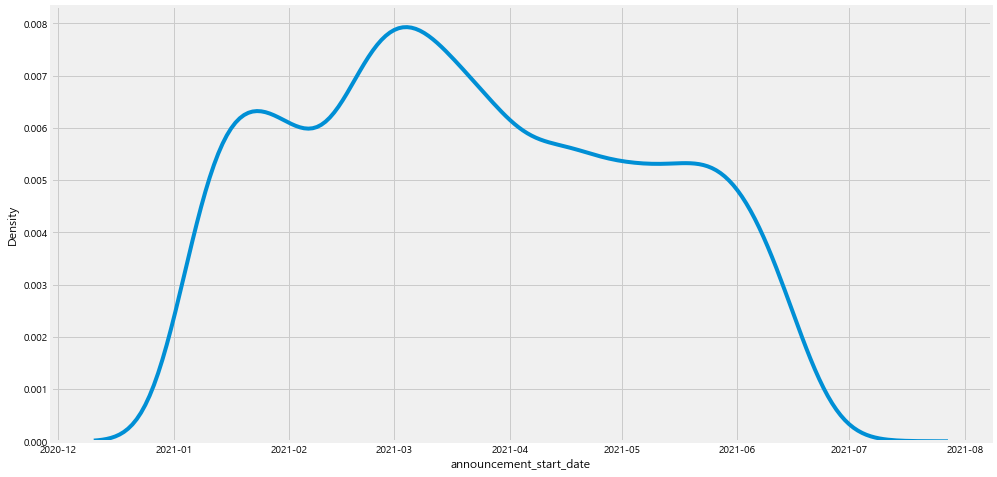

In [62]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_start_date')
plt.show()

### (2) kdeplot (hue = status)

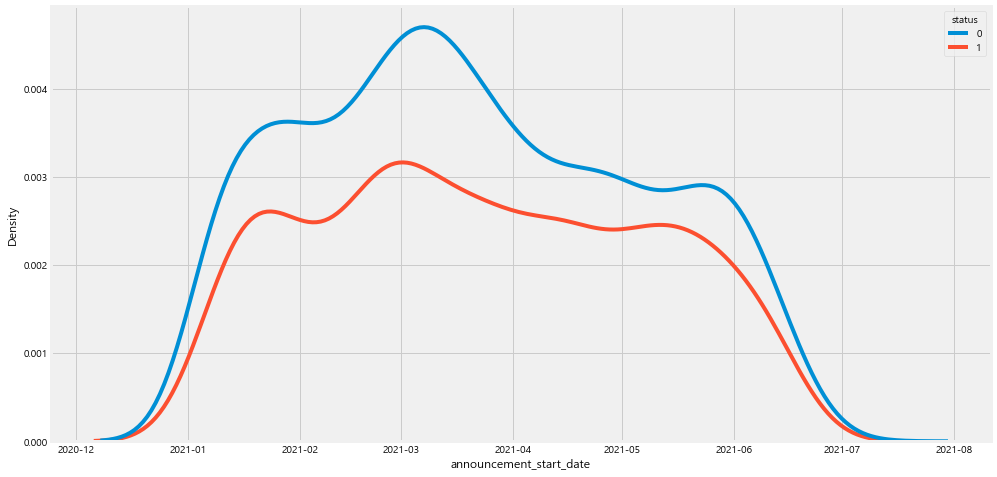

In [63]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_start_date', hue='status')
plt.show()

### 3-2) 3. announcement_end_date (공고 종료 날짜)

In [64]:
df_date['announcement_end_date'].value_counts()

2021-02-15    192
2021-03-15    137
2021-03-08    122
2021-03-02    112
2021-04-05    105
2021-04-26    103
2021-01-18    103
2021-05-10    101
2021-06-07    100
2021-03-29    100
2021-04-19     97
2021-03-22     96
2021-03-25     96
2021-02-01     92
2021-05-24     91
2021-01-25     91
2021-04-12     89
2021-06-14     88
2021-03-18     82
2021-05-31     80
2021-02-25     79
2021-05-03     79
2021-03-12     78
2021-02-08     78
2021-06-21     69
2021-03-05     67
2021-02-04     66
2021-03-04     55
2021-05-17     54
2021-02-22     48
2021-05-13     47
2021-04-30     47
2021-01-21     47
2021-05-20     46
2021-03-19     46
2021-04-01     46
2021-02-05     45
2021-01-15     43
2021-04-06     41
2021-04-08     41
2021-06-10     40
2021-02-18     39
2021-02-26     39
2021-05-28     37
2021-04-29     37
2021-06-04     37
2021-01-28     34
2021-05-14     31
2021-04-15     31
2021-06-28     31
2021-05-06     30
2021-01-26     29
2021-05-27     28
2021-02-19     28
2021-06-17     28
2021-03-09

### (1) kdeplot

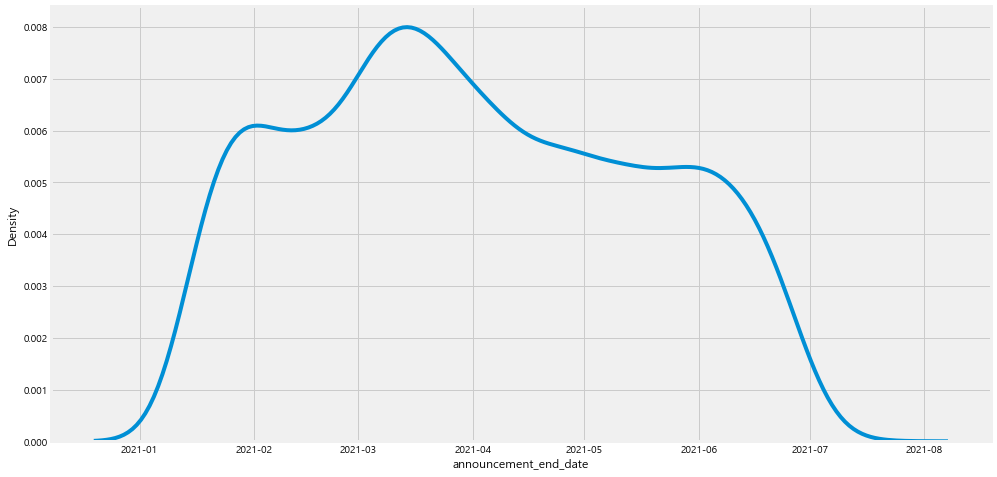

In [65]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_end_date')
plt.show()

### (2) kdeplot (hue = status)

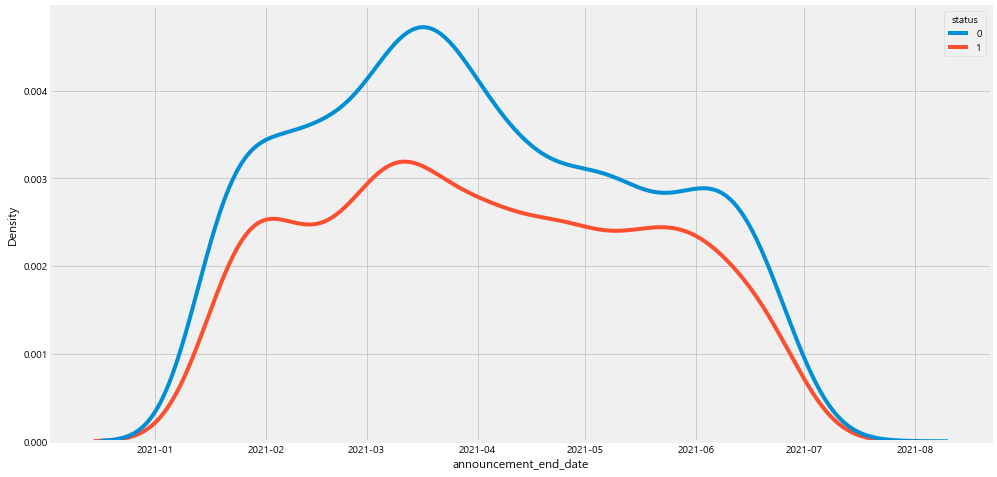

In [66]:
plt.figure(figsize = (15,8))
sns.kdeplot(data=df_date, x='announcement_end_date', hue='status')
plt.show()

date 관련 컬럼은 모두 그래프 상에서 유의미한 발견 불가 <br>
또한 시계열 데이터를 classification에 사용하는 것은 부적합

### 3-2) 4. date 관련 컬럼 삭제

In [67]:
df.drop(['received_date', 'announcement_start_date', 'announcement_end_date'], axis = 1, inplace = True)
print(df.columns)
print(len(df))

Index(['found_place', 'breed', 'color', 'age', 'weight', 'sex', 'is_neutered',
       'characteristic', 'shelter_name', 'jurisdiction_city', 'uniqueness',
       'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')
4579


## 3-3) found_place (발견 장소)

In [68]:
df_found_place = df[['found_place','status']]
df_found_place

,found_place,status
0,안양동 1336-1 부근,0
1,신천동 산18-2 부근,0
2,처인구 원삼면 원양로279-17,0
3,장내로100번길23-1 부근,0
4,부대 관사,0
...,...,...
4574,마도면 청원리 304-1 세진메탈,0
4575,마도면 청원리 304-1 세진메탈,0
4576,마도면 청원리 304-1 세진메탈,0
4577,마도면 청원리 304-1 세진메탈,0


### (1) 데이터 탐색

In [69]:
df_found_place['found_place'].isnull().sum()

0

In [70]:
df_found_place['found_place'].nunique()

2651

In [71]:
df_found_place.groupby('status')['found_place'].nunique()

status
0    1543
1    1350
Name: found_place, dtype: int64

문자열 데이터이며 unique값이 2651개나 되므로 사용 불가

### (2) found_place 컬럼 삭제

In [72]:
df.drop(["found_place"], axis = 1, inplace = True)
print(df.columns)
print(len(df))

Index(['breed', 'color', 'age', 'weight', 'sex', 'is_neutered',
       'characteristic', 'shelter_name', 'jurisdiction_city', 'uniqueness',
       'WGS84_latitude', 'WGS84_longitude', 'status'],
      dtype='object')
4579


## 3-4) breed (품종)

### (1) 데이터 탐색

In [73]:
df_breed=df[['breed', 'status']]
df_breed

,breed,status
0,믹스견,0
1,믹스견,0
2,믹스견,0
3,믹스견,0
4,믹스견,0
...,...,...
4574,믹스견,0
4575,믹스견,0
4576,믹스견,0
4577,믹스견,0


In [74]:
df_breed["breed"].isnull().sum()

0

In [75]:
df_breed["breed"].value_counts()

믹스견             3737
말티즈              135
푸들               113
진도견               69
포메라니안             60
라브라도 리트리버         38
풍산견               36
치와와               35
스피츠               34
시츄                28
웰시 코기 펨브로크        23
비숑 프리제            23
골든 리트리버           22
프렌치 불독            16
요크셔 테리어           14
시바                14
보더 콜리             12
시베리안 허스키          12
닥스훈트              12
코카 스파니엘           12
미니어쳐 핀셔           10
보스턴 테리어            9
불독                 8
사모예드               7
페키니즈               5
비글                 5
알라스칸 말라뮤트          5
미디엄 푸들             5
복서                 5
포인터                4
샤페이                4
토이 푸들              4
도사                 3
삽살개                3
슈나우져               3
퍼그                 3
셰퍼드                3
그레이트 피레니즈          3
차우차우               3
잉글리쉬 세터            3
도베르만               3
동경견                2
말라뮤트               2
코리아 트라이 하운드        2
롯트와일러              2
셔틀랜드 쉽독            2
스탠다드 푸들            2
이탈리안 그레이 하운드 

In [76]:
len(df_breed["breed"].value_counts())

70

### (2) plot.bar

In [77]:
df_breed_top6 = df_breed["breed"].value_counts().head(6)
df_breed_top6

믹스견          3737
말티즈           135
푸들            113
진도견            69
포메라니안          60
라브라도 리트리버      38
Name: breed, dtype: int64

<AxesSubplot:>

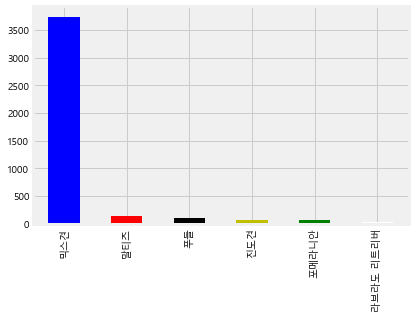

In [78]:
df_breed_top6.plot.bar(color=['b', 'r', 'k', 'y', 'green', 'w'])

In [79]:
df_breed_top5 = df_breed_top6.drop("믹스견")
df_breed_top5

말티즈          135
푸들           113
진도견           69
포메라니안         60
라브라도 리트리버     38
Name: breed, dtype: int64

<AxesSubplot:>

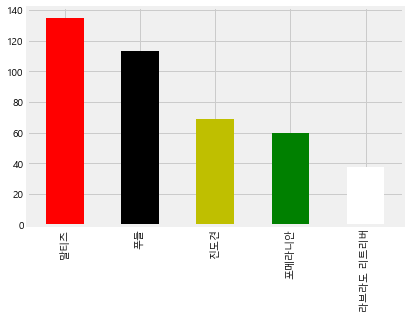

In [80]:
df_breed_top5.plot.bar(color=['r', 'k', 'y', 'green', 'w'])

품종이 너무 많아 믹스견과 상위 5개 데이터만 시각화 <br>
믹스견 데이터 수가 압도적으로 많음

<AxesSubplot:xlabel='breed', ylabel='count'>

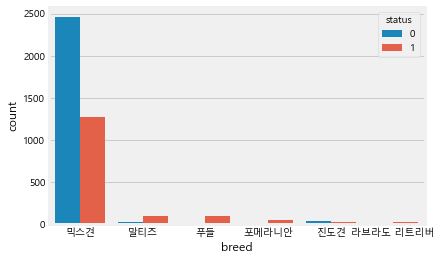

In [81]:
df_breed_mix_dog = df[df["breed"].isin(df['breed'].value_counts().index[:6])]
sns.countplot(data=df_breed_mix_dog, x='breed', hue='status')

타 견종 대비 믹스견 입양 성공이 현저히 적음

<AxesSubplot:xlabel='breed', ylabel='count'>

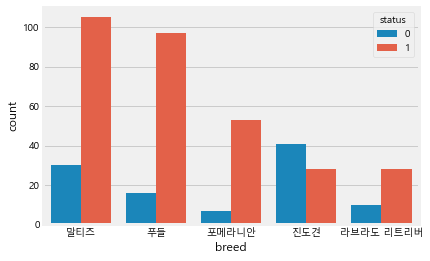

In [82]:
df_breed_top5_dog = df[df["breed"].isin(df['breed'].value_counts().index[1:6])]
sns.countplot(data=df_breed_top5_dog, x='breed', hue='status')

### (3) 믹스견과 상위 5개의 품종 확인 및 추출

In [83]:
print(df['breed'].value_counts().index[:6].values)
df = df[df["breed"].isin(df['breed'].value_counts().index[:6])]
df["breed"].value_counts()

['믹스견' '말티즈' '푸들' '진도견' '포메라니안' '라브라도 리트리버']


믹스견          3737
말티즈           135
푸들            113
진도견            69
포메라니안          60
라브라도 리트리버      38
Name: breed, dtype: int64

### (4) 더미 변수화

In [84]:
df = pd.get_dummies(df, columns = ["breed"])
print(df.columns)
print(len(df))

Index(['color', 'age', 'weight', 'sex', 'is_neutered', 'characteristic',
       'shelter_name', 'jurisdiction_city', 'uniqueness', 'WGS84_latitude',
       'WGS84_longitude', 'status', 'breed_라브라도 리트리버', 'breed_말티즈',
       'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들'],
      dtype='object')
4152


## 3-5) color (색상)

In [85]:
df_color=df[['color', 'status']]
df_color

,color,status
0,white,0
1,mix,0
2,brown,0
3,black,0
4,brown,0
...,...,...
4574,white,0
4575,white,0
4576,white,0
4577,white,0


In [86]:
df_color["color"].isnull().sum()

0

In [87]:
df_color["color"].value_counts()

white     1659
mix       1152
brown      845
black      338
yellow     158
Name: color, dtype: int64

### (1) histplot

(array([1659.,    0., 1152.,    0.,  845.,    0.,  338.,    0.,  158.]),
 array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
        2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
 <BarContainer object of 9 artists>)

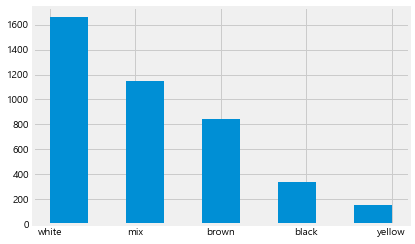

In [88]:
plt.hist(df_color["color"], bins=9)

### (2) countplot

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'white'),
  Text(1, 0, 'mix'),
  Text(2, 0, 'brown'),
  Text(3, 0, 'black'),
  Text(4, 0, 'yellow')])

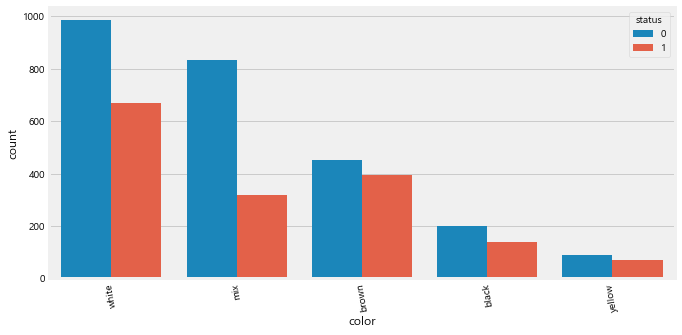

In [89]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_color, x='color', hue='status')
plt.xticks(rotation=100)

white-mix-brown-black-yellow 순으로 데이터 수 많음 <br>
타 색상 대비 mix의 입양 성공이 현저히 적음 

### (3) 더미변수화

In [90]:
df = pd.get_dummies(df, columns = ["color"])
print(df.columns)
print(len(df))

Index(['age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
       'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow'],
      dtype='object')
4152


## 3-6) age (나이)

### (1) barplot

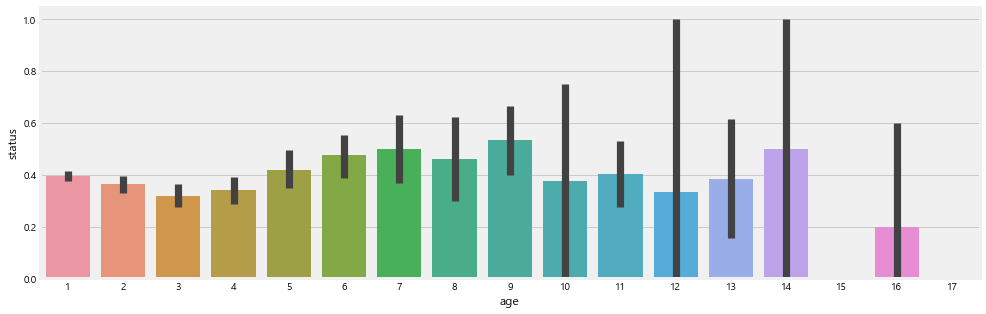

In [91]:
plt.figure(figsize=(15,5))
sns.barplot(x='age',y='status',data=df)

plt.show()

### (2) histplot

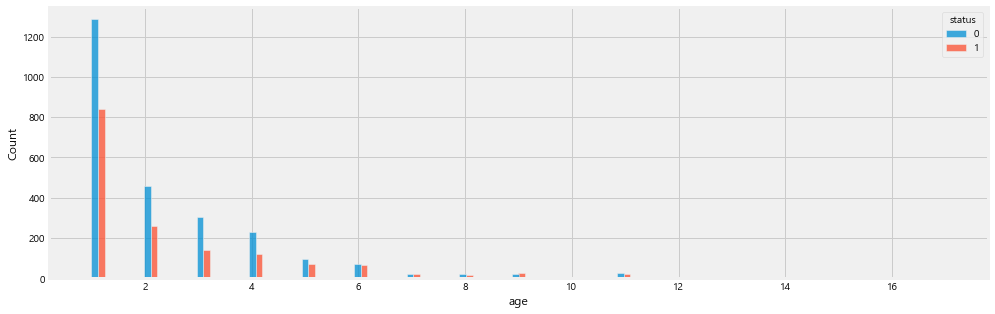

In [92]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="age", hue="status" ,multiple="dodge")

plt.show()

### (3) boxplot

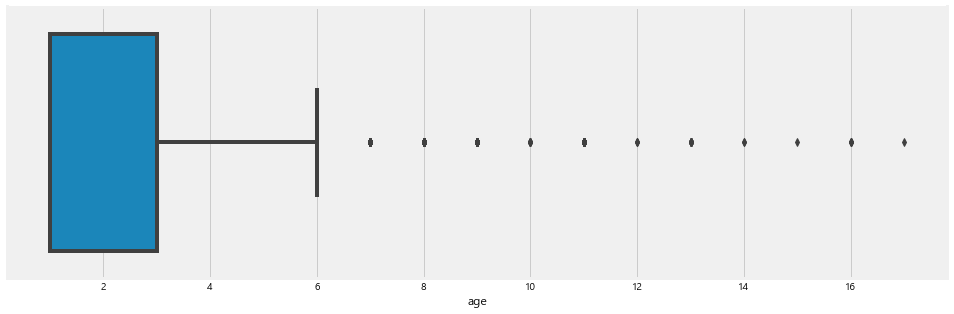

In [93]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "age", data = df)

plt.show()

In [94]:
age_Q1 = np.percentile(df["age"], 25) 
age_Q3 = np.percentile(df["age"], 75)
age_IQR = age_Q3 - age_Q1

age_upper = age_Q3 + 1.5 * age_IQR

if age_Q1 - 1.5 * age_IQR <= 0 :
    age_lower = 0
else :
    age_lower = age_Q1 - 1.5 * age_IQR
    
print("최대 :", age_upper, "  최소 :", age_lower)

최대 : 6.0   최소 : 0


In [95]:
print("전체 데이터 개수 : ", len(df))
print("6살 이상 데이터 개수 : ", len(df[df["age"] >= age_upper]))

전체 데이터 개수 :  4152
6살 이상 데이터 개수 :  345


In [96]:
print(df.columns)
print(len(df))

Index(['age', 'weight', 'sex', 'is_neutered', 'characteristic', 'shelter_name',
       'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow'],
      dtype='object')
4152


1살일 때 입양 성공 수가 압도적으로 많음 <BR>
이후 5살까지 입양 성공 수는 순차적으로 감소하며 6살 이후로는 입양 성공이 매우 어려움 <BR>
삭제하진는 않음

## 3-7) weight (무게)

In [97]:
df_weight = df[['weight', 'status']]
df_weight

,weight,status
0,4.00,0
1,12.00,0
2,4.65,0
3,4.50,0
4,5.80,0
...,...,...
4574,1.00,0
4575,1.00,0
4576,1.00,0
4577,1.00,0


### (1) boxplot

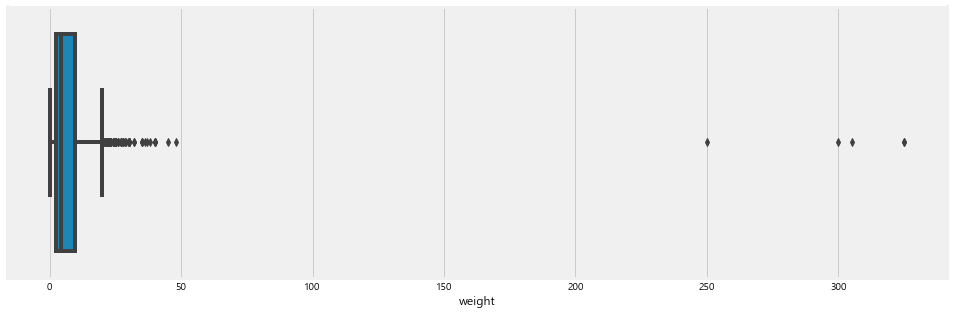

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "weight", data = df_weight)

plt.show()

In [99]:
print("전체 데이터 개수 : ", len(df))
print("100kg 이상인 데이터 개수 : ", len(df[df["weight"] >= 100]))

전체 데이터 개수 :  4152
100kg 이상인 데이터 개수 :  5


### 100kg 이상 이상치 제거

In [100]:
df = df[df["weight"] <= 100]
df_weight = df[['weight', 'status']]
len(df)

4147

<AxesSubplot:xlabel='weight'>

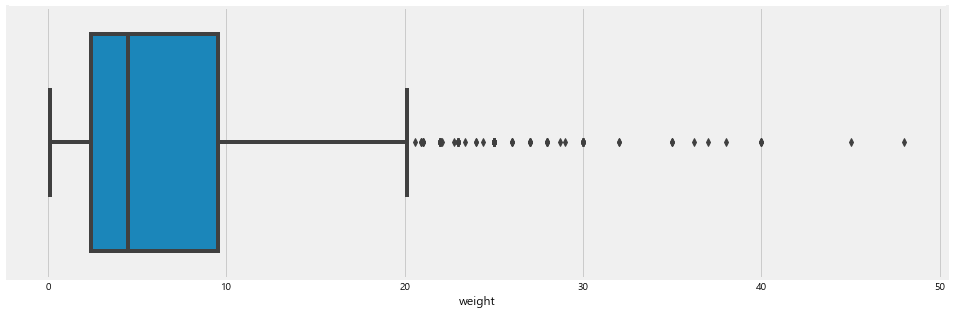

In [101]:
plt.figure(figsize=(15,5))
sns.boxplot(x = "weight", data = df)

In [102]:
weight_Q1 = np.percentile(df_weight["weight"], 25) 
weight_Q3 = np.percentile(df_weight["weight"], 75)
weight_IQR = weight_Q3 - weight_Q1

weight_upper = weight_Q3 + 1.5 * weight_IQR

if weight_Q1 - 1.5 * weight_IQR <= 0 :
    weight_lower = 0
else :
    weight_lower = weight_Q1 - 1.5 * weight_IQR
    
print("최대 :", weight_upper, "  최소 :", weight_lower)

최대 : 20.15   최소 : 0


In [103]:
print("전체 데이터 개수 : ", len(df))
print("20.15kg 이상인 데이터 개수 : ", len(df[df["weight"] >= weight_upper]))

전체 데이터 개수 :  4147
20.15kg 이상인 데이터 개수 :  129


### 20.15kg 이상 이상치 제거

In [104]:
df = df[df["weight"] <= weight_upper]
df_weight = df[['weight', 'status']]
len(df)

4018

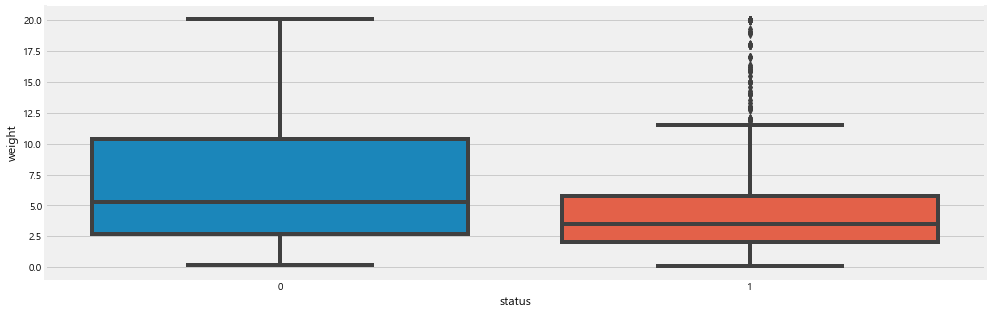

In [105]:
plt.figure(figsize=(15,5))

sns.boxplot(x = "status", y = "weight", data = df_weight)

plt.show()

### (4) histplot

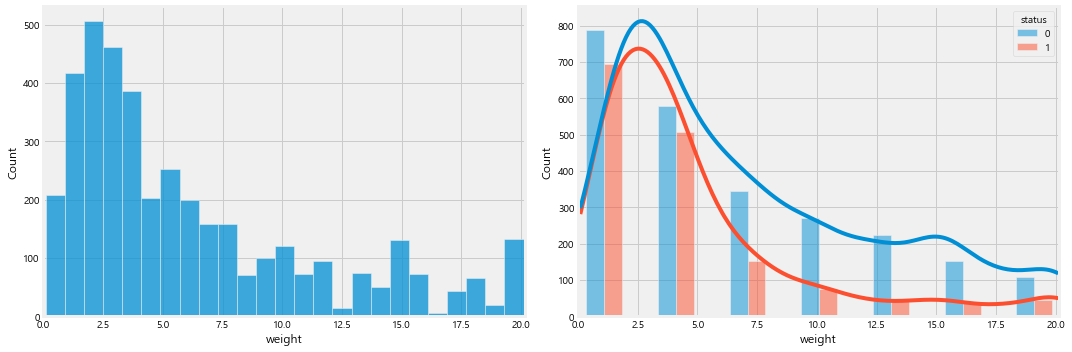

In [106]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.histplot(data=df_weight, x="weight")
plt.xlim([weight_lower, weight_upper]) 
plt.subplot(122)
sns.histplot(data=df_weight, x="weight", shrink=.5, hue="status", multiple="dodge", binwidth=3, kde=True)
plt.xlim([weight_lower, weight_upper]) 

plt.tight_layout()

plt.show()

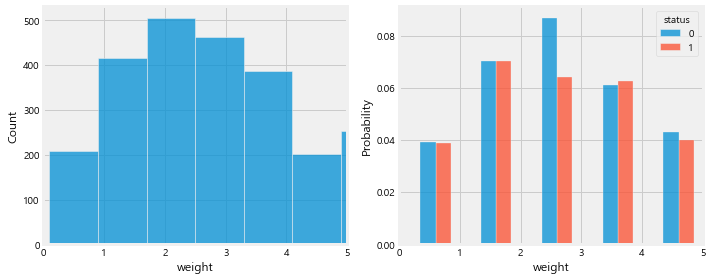

In [107]:
plt.figure(figsize=(10,4))

plt.subplot(121)
sns.histplot(data=df_weight, x="weight")
plt.xlim([0, 5]) 
plt.subplot(122)
sns.histplot(data=df_weight, x="weight", shrink=.5, hue="status", multiple="dodge", stat='probability',binwidth=1)
plt.xlim([0,5]) 

plt.tight_layout()
plt.show()

몸무게가 5kg 이하일 때 유의미하게 입양 성공 수가 많음 <br>
5kg 내에서는 2-3kg가 제일 입양 수가 많음

## 3-8) sex (성별)

### (1) 데이터 탐색

In [108]:
df['sex'].value_counts() 

F    2040
M    1958
Q      20
Name: sex, dtype: int64

In [109]:
df = df[df['sex'] != "Q"]
df['sex'].value_counts() 

F    2040
M    1958
Name: sex, dtype: int64

### (2) barplot

<AxesSubplot:xlabel='sex', ylabel='status'>

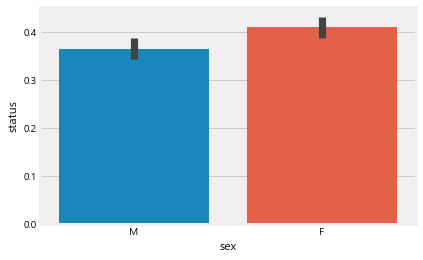

In [110]:
sns.barplot(x='sex',y='status',data=df)

### (3) countplot

<AxesSubplot:xlabel='sex', ylabel='count'>

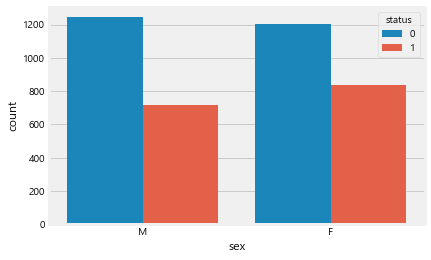

In [111]:
sns.countplot('sex', hue='status' , data=df)

Q값(알수없음) 제거 후 시각화 <BR>
성별 대비 입양 성공 수는 큰 차이가 없음

### (4) 더미변수화

In [112]:
df = pd.get_dummies(df, columns = ["sex"])

print(df.columns)
print(len(df))

Index(['age', 'weight', 'is_neutered', 'characteristic', 'shelter_name',
       'jurisdiction_city', 'uniqueness', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M'],
      dtype='object')
3998


## 3-9) is_neutered (중성화 여부)

### (1) 데이터 탐색

In [113]:
df_is_neutered = df[['is_neutered', 'status']]
df_is_neutered

,is_neutered,status
0,N,0
1,U,0
2,N,0
3,N,0
4,N,0
...,...,...
4574,N,0
4575,N,0
4576,N,0
4577,N,0


In [114]:
df_is_neutered['is_neutered'].value_counts()

N    3026
U     874
Y      98
Name: is_neutered, dtype: int64

### (2) pieplot, countplot

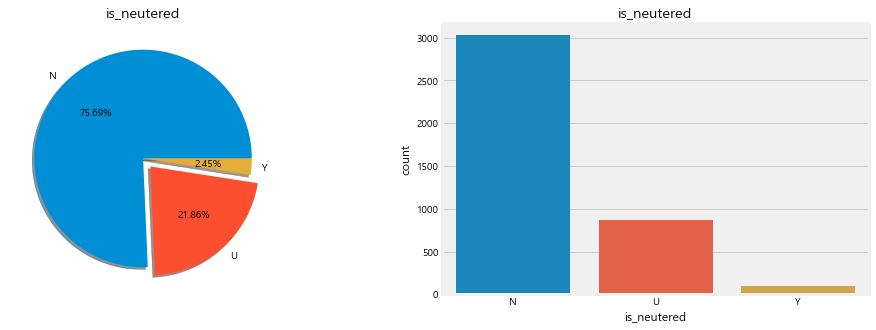

In [115]:
f, ax = plt.subplots(1, 2, figsize = (15, 5))
df_is_neutered['is_neutered'].value_counts().plot.pie(explode = [0, 0.1, 0],
                                                      autopct = '%1.2f%%', 
                                                      ax = ax[0], shadow = True)
ax[0].set_title('is_neutered')
ax[0].set_ylabel('')
sns.countplot('is_neutered', data = df_is_neutered, ax = ax[1])
ax[1].set_title('is_neutered')
plt.show()

<AxesSubplot:xlabel='is_neutered', ylabel='count'>

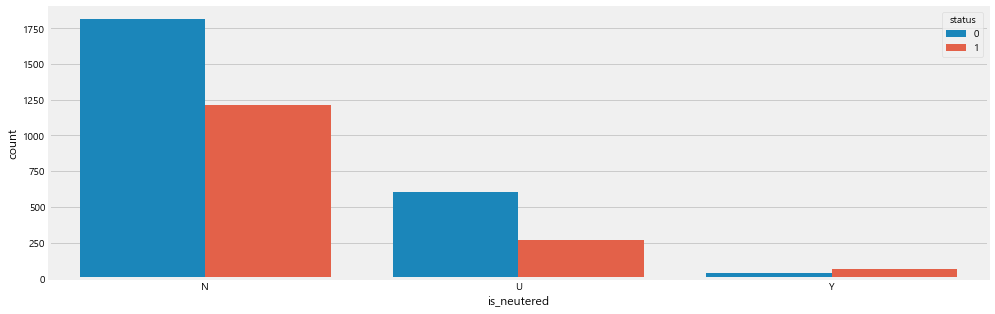

In [116]:
plt.figure(figsize=(15,5))

sns.countplot(x = 'is_neutered', data = df_is_neutered, hue = "status")

U값(언노운)의 갯수가 많아 포함하여 시각화 <BR>
중성화 여부로 인한 유의미한 차이는 없음 <BR>

### (3) 더미변수화

In [117]:
df = pd.get_dummies(df, columns = ["is_neutered"])

print(df.columns)
print(len(df))

Index(['age', 'weight', 'characteristic', 'shelter_name', 'jurisdiction_city',
       'uniqueness', 'WGS84_latitude', 'WGS84_longitude', 'status',
       'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안',
       'breed_푸들', 'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')
3998


## 3-10) characteristic (특징)

### (1) 데이터 탐색

In [118]:
df_characteristic = df[['characteristic', 'status']]
df_characteristic.value_counts()

characteristic                               status
없음                                           0         125
강아지                                          0          87
순함                                           1          58
어린강아지임                                       0          55
경계함                                          0          55
                                                      ... 
분홍하네스,겁많음, 주인사망                              1           1
분홍하네스/끊긴 빨간리드줄. 활발함/사람좋아함. 꼬리단미안됨. 털상태 양호.   0           1
붉은색 목걸이, 사슬목줄, 배회                            1           1
붉은색 목줄에 대양이라고 적혀있다. 매우순하고 파란목줄아이와 같이 구조되었다.  0           1
흰생 시골강아지                                     0           1
Length: 2520, dtype: int64

문자열 데이터이며 unique값이 2600여개나 되므로 사용 불가  

### (2) characteristic 컬럼 삭제

In [119]:
df.drop(["characteristic"], axis = 1, inplace = True)

print(df.columns)
print(len(df))

Index(['age', 'weight', 'shelter_name', 'jurisdiction_city', 'uniqueness',
       'WGS84_latitude', 'WGS84_longitude', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')
3998


## 3-11) shelter_name (보호소 이름)

In [120]:
df[["shelter_name"]]

,shelter_name
0,한국야생동물보호협회
1,한국야생동물보호협회
2,용인시 동물보호센터
3,한국야생동물보호협회
4,버디종합동물병원
...,...
4574,남양유기견보호센터
4575,남양유기견보호센터
4576,남양유기견보호센터
4577,남양유기견보호센터


In [121]:
df[["shelter_name"]].value_counts()

shelter_name
한국동물구조관리협회      998
평택시유기동물보호소      637
남양유기견보호센터       449
한국야생동물보호협회      339
남양주동물보호협회       338
위더스 동물보호센터      258
이성준동물병원         174
용인시 동물보호센터       84
고양시동물보호센터        81
양평군유기동물보호소       76
펫토피아동물병원         75
하남동물병원           61
광주TNR동물병원초월      58
가평군유기동물보호소       55
오산시수의사회          43
수원시 동물보호센터       41
행복한동물병원          39
버디종합동물병원         37
파주독 애견호텔         35
나은동물병원           20
가나동물병원           19
로뎀동물병원           13
24시아이동물메디컬       12
웰니스클리닉           11
cj동물병원           10
파주24시동물병원         9
군포시청              6
가야동물병원            6
문산동물병원            4
금릉동물병원            3
부천시수의사회           3
미엘동물병원            2
의왕시청              1
가온동물병원            1
dtype: int64

### (1) countplot

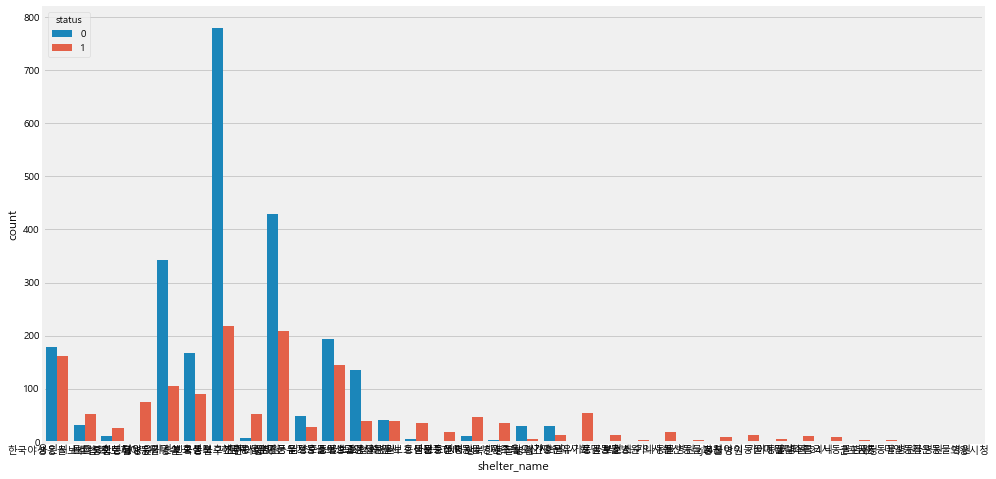

In [122]:
plt.figure(figsize = (15,8))

sns.countplot(x = "shelter_name", hue = "status", data = df)
plt.show()

### (2) countplot (상위 10개)

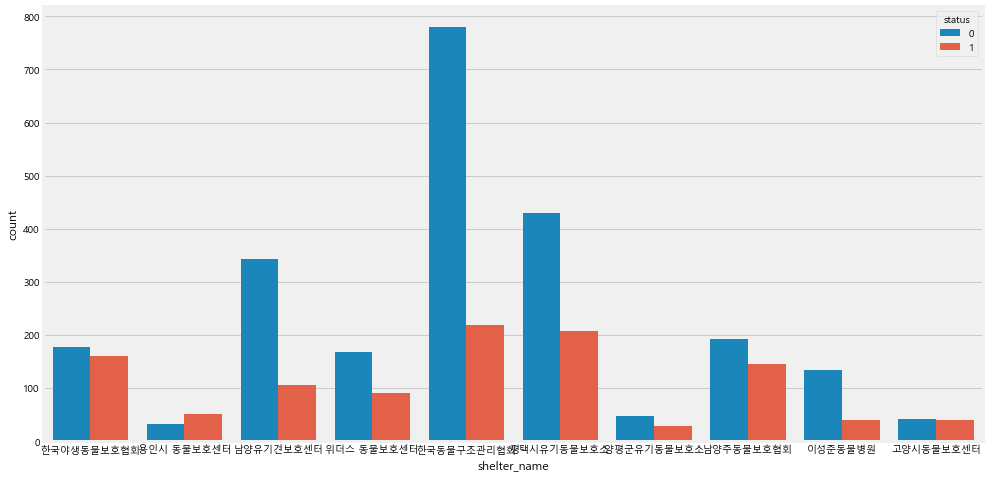

In [123]:
plt.figure(figsize = (15,8))

sns.countplot(x = "shelter_name", hue = "status", data = df[df["shelter_name"].isin(df['shelter_name'].value_counts().index[:10])])
plt.show()

### (3) countplot (하위 10개)

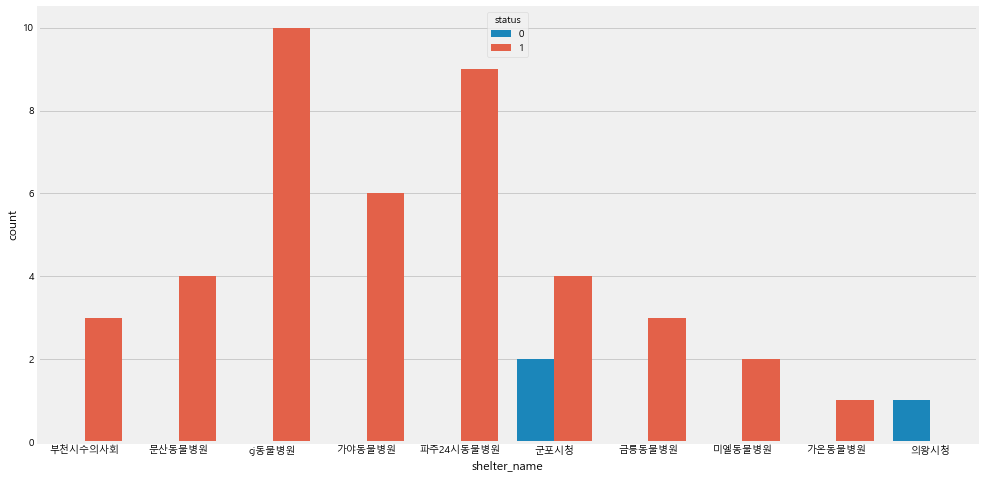

In [124]:
plt.figure(figsize = (15,8))

sns.countplot(x = "shelter_name", hue = "status", data = df[df["shelter_name"].isin(df['shelter_name'].value_counts().index[-10:])])
plt.show()

### (4) 보호소 별 입양 성공, 실패 및 그 비율 확인

In [125]:
df_shelter_name = df[["shelter_name"]]
df_shelter_name = df_shelter_name.drop_duplicates()
df_shelter_name.reset_index(inplace = True)
df_shelter_name.drop(["index"], axis = 1, inplace = True)
df_shelter_name["success"] = 0
df_shelter_name["fail"] = 0


for i in df.index :
    for j in df_shelter_name.index :
        if df.loc[i]["shelter_name"] == df_shelter_name.loc[j]["shelter_name"] :
            if df.loc[i]["status"] == 1 :
                df_shelter_name.at[j,"success"] = df_shelter_name.loc[j]["success"] + 1
            else :
                df_shelter_name.at[j,"fail"] = df_shelter_name.loc[j]["fail"] + 1

                
df_shelter_name["total"] = df_shelter_name["success"] + df_shelter_name["fail"]
df_shelter_name["success_ratio"] = df_shelter_name["success"]/df_shelter_name["total"]

df_shelter_name

,shelter_name,success,fail,total,success_ratio
0,한국야생동물보호협회,161,178,339,0.474926
1,용인시 동물보호센터,52,32,84,0.619048
2,버디종합동물병원,26,11,37,0.702703
3,펫토피아동물병원,75,0,75,1.000000
4,남양유기견보호센터,106,343,449,0.236080
5,위더스 동물보호센터,90,168,258,0.348837
6,한국동물구조관리협회,218,780,998,0.218437
7,하남동물병원,53,8,61,0.868852
8,평택시유기동물보호소,208,429,637,0.326531
9,양평군유기동물보호소,28,48,76,0.368421


In [126]:
df_shelter_name.sort_values(by=['success_ratio'], ascending=[False]).head(10)

,shelter_name,success,fail,total,success_ratio
31,미엘동물병원,2,0,2,1.0
32,가온동물병원,1,0,1,1.0
30,금릉동물병원,3,0,3,1.0
3,펫토피아동물병원,75,0,75,1.0
28,파주24시동물병원,9,0,9,1.0
27,웰니스클리닉,11,0,11,1.0
26,가야동물병원,6,0,6,1.0
25,24시아이동물메디컬,12,0,12,1.0
24,cj동물병원,10,0,10,1.0
23,문산동물병원,4,0,4,1.0


In [127]:
df_shelter_name.sort_values(by=['total'], ascending=[False]).head(10)

,shelter_name,success,fail,total,success_ratio
6,한국동물구조관리협회,218,780,998,0.218437
8,평택시유기동물보호소,208,429,637,0.326531
4,남양유기견보호센터,106,343,449,0.236080
0,한국야생동물보호협회,161,178,339,0.474926
10,남양주동물보호협회,145,193,338,0.428994
5,위더스 동물보호센터,90,168,258,0.348837
11,이성준동물병원,39,135,174,0.224138
1,용인시 동물보호센터,52,32,84,0.619048
12,고양시동물보호센터,40,41,81,0.493827
9,양평군유기동물보호소,28,48,76,0.368421


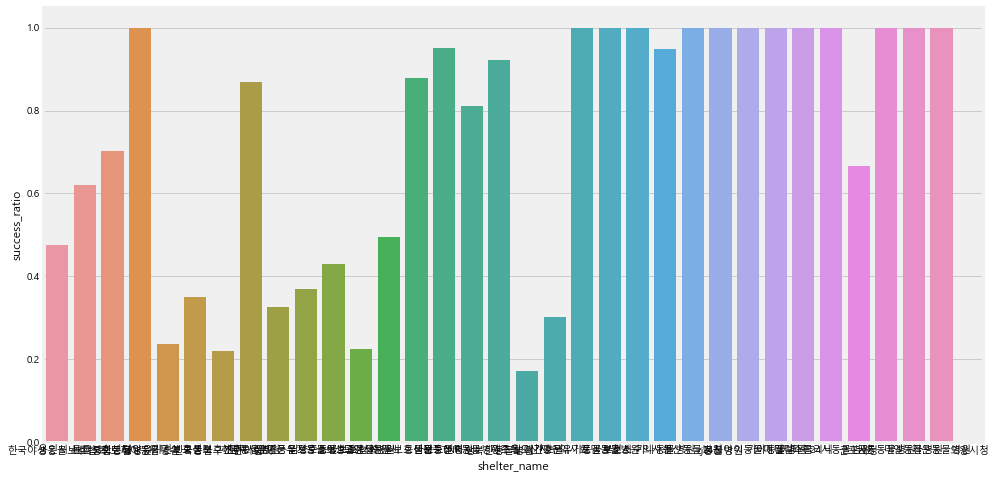

In [128]:
plt.figure(figsize = (15,8))
sns.barplot(x = "shelter_name", y = "success_ratio", data = df_shelter_name)

plt.show()

In [129]:
print(df.columns)
print(len(df))

Index(['age', 'weight', 'shelter_name', 'jurisdiction_city', 'uniqueness',
       'WGS84_latitude', 'WGS84_longitude', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')
3998


보호소별 입양 성공에 차이가 보이지만 unique값이 30여개로 많음 <br>

## 3-12) jurisdiction_city (행정구역)

### (1) 데이터 탐색

In [130]:
df["jurisdiction_city"]

0       경기도 안양시
1       경기도 시흥시
2       경기도 용인시
3       경기도 안양시
4       경기도 파주시
         ...   
4574    경기도 화성시
4575    경기도 화성시
4576    경기도 화성시
4577    경기도 화성시
4578    경기도 화성시
Name: jurisdiction_city, Length: 3998, dtype: object

문자열 데이터이며 unique값이 많아 사용 불가

### (2) jurisdiction_city 컬럼 삭제

In [131]:
df.drop(["jurisdiction_city"], axis = 1, inplace = True)

print(df.columns)
print(len(df))

Index(['age', 'weight', 'shelter_name', 'uniqueness', 'WGS84_latitude',
       'WGS84_longitude', 'status', 'breed_라브라도 리트리버', 'breed_말티즈',
       'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'color_black',
       'color_brown', 'color_mix', 'color_white', 'color_yellow', 'sex_F',
       'sex_M', 'is_neutered_N', 'is_neutered_U', 'is_neutered_Y'],
      dtype='object')
3998


## 3-13) uniqueness (특이사항)

### (1) 데이터 탐색

In [132]:
df["uniqueness"].value_counts()

공고후 안락사          14
공고후 안락사.          9
공고후안락사            4
공고후 입양.           3
공고후 자연사.          1
간질 발작             1
공고후               1
슬개골 탈구 3기         1
구토, 설사            1
간헐적인 발작, 통증심함     1
공고후 안락사           1
음낭주변 피부 상처        1
Name: uniqueness, dtype: int64

In [133]:
df["uniqueness"].isnull().sum()

3960

결측치가 4000여개나 되므로 사용 불가

### (2) uniqueness 컬럼 삭제

In [134]:
df.drop(["uniqueness"], axis = 1, inplace = True)
df.columns

Index(['age', 'weight', 'shelter_name', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N',
       'is_neutered_U', 'is_neutered_Y'],
      dtype='object')

In [135]:
print(df.columns)
print(len(df))

Index(['age', 'weight', 'shelter_name', 'WGS84_latitude', 'WGS84_longitude',
       'status', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견', 'breed_진도견',
       'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown', 'color_mix',
       'color_white', 'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N',
       'is_neutered_U', 'is_neutered_Y'],
      dtype='object')
3998


## 3-14) latitude & longitude (위도와 경도)
- WGS84_latitude (위도)      
- WGS84_longitude (경도)

### 3-14) 1. WGS84_latitude (위도)

<AxesSubplot:xlabel='WGS84_latitude', ylabel='Count'>

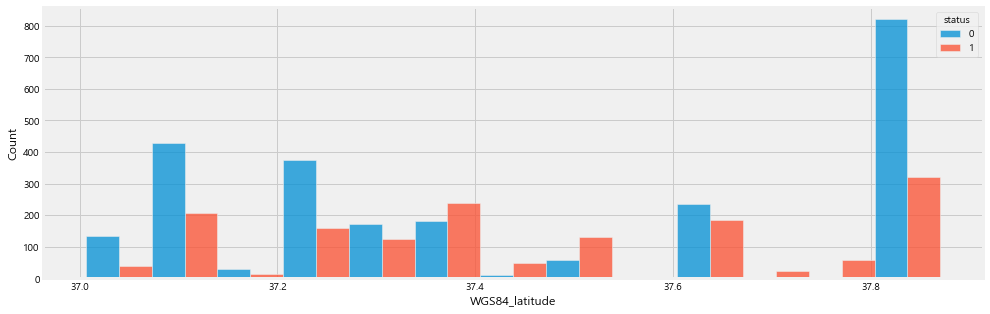

In [136]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="WGS84_latitude", hue="status" ,multiple="dodge")

<AxesSubplot:xlabel='WGS84_latitude', ylabel='status'>

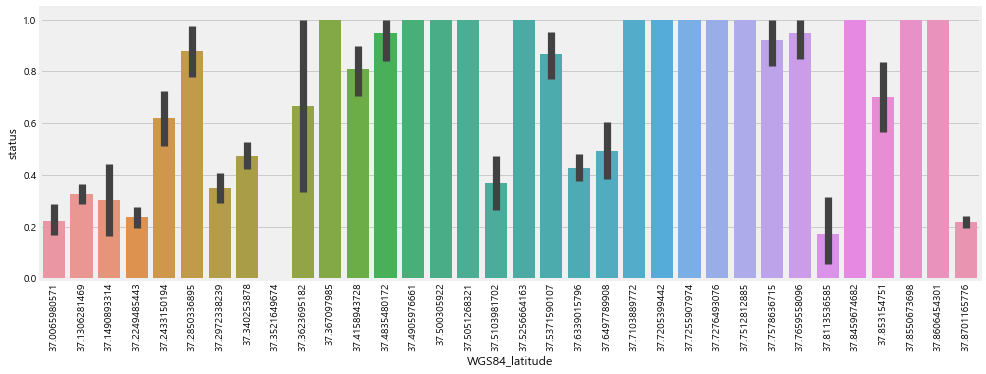

In [137]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x='WGS84_latitude',y='status',data=df)

### 3-14) 2. WGS84_longitude (경도)

<AxesSubplot:xlabel='WGS84_latitude', ylabel='Count'>

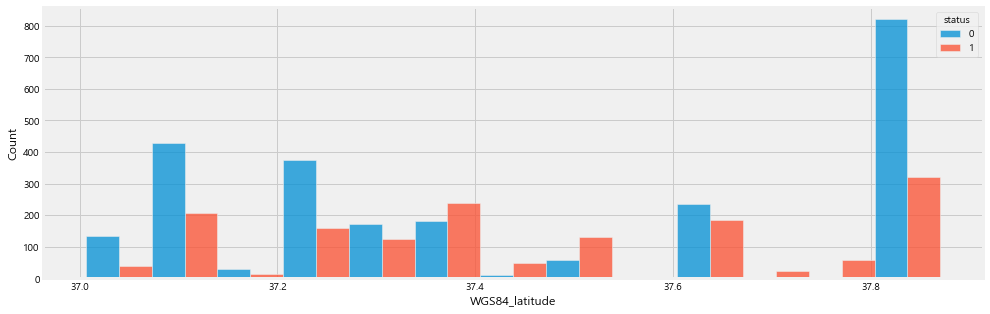

In [138]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="WGS84_latitude", hue="status" ,multiple="dodge")

<AxesSubplot:xlabel='WGS84_latitude', ylabel='status'>

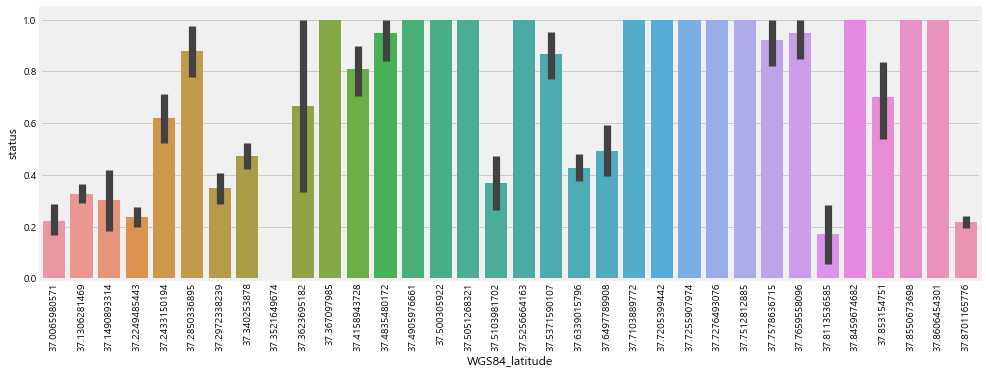

In [139]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.barplot(x='WGS84_latitude',y='status',data=df)

중간값 위/경도의 입양 성공 수가 많으나 shelter_name과 중복

### 3-14) 3. latitude&longitude 컬럼 삭제

In [140]:
df.drop(["WGS84_latitude", "WGS84_longitude"], axis = 1, inplace = True)

print(df.columns)
print(len(df))

Index(['age', 'weight', 'shelter_name', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')
3998


## 3-15) EDA & FE 2 마무리
 - 데이터 재확인
 - index 재정렬

In [141]:
df

,age,weight,shelter_name,status,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y
0,1,4.00,한국야생동물보호협회,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,6,12.00,한국야생동물보호협회,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
2,3,4.65,용인시 동물보호센터,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
3,1,4.50,한국야생동물보호협회,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,1,5.80,버디종합동물병원,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4574,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4575,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4576,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
4577,1,1.00,남양유기견보호센터,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0


In [142]:
df.columns

Index(['age', 'weight', 'shelter_name', 'status', 'breed_라브라도 리트리버',
       'breed_말티즈', 'breed_믹스견', 'breed_진도견', 'breed_포메라니안', 'breed_푸들',
       'color_black', 'color_brown', 'color_mix', 'color_white',
       'color_yellow', 'sex_F', 'sex_M', 'is_neutered_N', 'is_neutered_U',
       'is_neutered_Y'],
      dtype='object')

In [143]:
df_data = df[df.columns].drop("status", axis = 1)
df_target = df[["status"]]

df = df_data[df_data.columns]
df["status"] = df_target["status"]

df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)
df

,age,weight,shelter_name,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,한국야생동물보호협회,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,6,12.00,한국야생동물보호협회,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,3,4.65,용인시 동물보호센터,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,한국야생동물보호협회,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,1,5.80,버디종합동물병원,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3994,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3995,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3996,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0


# 4. EDA & FE 3 : 최종 정리

## 4-1) 방향성 확인

In [144]:
df

,age,weight,shelter_name,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,한국야생동물보호협회,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,6,12.00,한국야생동물보호협회,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,3,4.65,용인시 동물보호센터,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,한국야생동물보호협회,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,1,5.80,버디종합동물병원,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3994,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3995,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3996,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0


1) breed를 믹스견과 믹스견을 제외한 상위 5종으로 분할 <br>
2) 보호소 column의 유무 <br>
이상 4종류의 데이터를 만들어 머신 러닝 모델 구동

## 4-2) 품종이 믹스견인 데이터 추출

In [145]:
df_breed_mix = df[df["breed_믹스견"] == 1]


df_breed_mix.reset_index(inplace = True)
df_breed_mix.drop(["index"], axis = 1, inplace = True)
df_breed_mix

,age,weight,shelter_name,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,1,4.00,한국야생동물보호협회,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,6,12.00,한국야생동물보호협회,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,3,4.65,용인시 동물보호센터,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
3,1,4.50,한국야생동물보호협회,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0
4,1,5.80,버디종합동물병원,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3606,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3607,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3608,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0
3609,1,1.00,남양유기견보호센터,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0


### (1) 믹스견 + 보호소 더미변수화

In [146]:
df_breed_mix_shelter = pd.get_dummies(df_breed_mix, columns = ["shelter_name"])

df_breed_mix_shelter_data = df_breed_mix_shelter.drop("status", axis = 1)
df_breed_mix_shelter_target = df_breed_mix_shelter[["status"]]

df_breed_mix_shelter = df_breed_mix_shelter_data[df_breed_mix_shelter_data.columns]
df_breed_mix_shelter["status"] = df_breed_mix_shelter_target["status"]

print(df_breed_mix_shelter.columns)
print(len(df_breed_mix_shelter))

Index(['age', 'weight', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견',
       'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown',
       'color_mix', 'color_white', 'color_yellow', 'sex_F', 'sex_M',
       'is_neutered_N', 'is_neutered_U', 'is_neutered_Y',
       'shelter_name_24시아이동물메디컬', 'shelter_name_cj동물병원', 'shelter_name_가나동물병원',
       'shelter_name_가야동물병원', 'shelter_name_가평군유기동물보호소',
       'shelter_name_고양시동물보호센터', 'shelter_name_광주TNR동물병원초월',
       'shelter_name_군포시청', 'shelter_name_금릉동물병원', 'shelter_name_나은동물병원',
       'shelter_name_남양유기견보호센터', 'shelter_name_남양주동물보호협회',
       'shelter_name_로뎀동물병원', 'shelter_name_문산동물병원', 'shelter_name_미엘동물병원',
       'shelter_name_버디종합동물병원', 'shelter_name_부천시수의사회',
       'shelter_name_수원시 동물보호센터', 'shelter_name_양평군유기동물보호소',
       'shelter_name_오산시수의사회', 'shelter_name_용인시 동물보호센터',
       'shelter_name_웰니스클리닉', 'shelter_name_위더스 동물보호센터', 'shelter_name_의왕시청',
       'shelter_name_이성준동물병원', 'shelter_name_파주24시동물병원',
       'sh

### (2) 믹스견 + 보호소 data 삭제

In [147]:
df_breed_mix.drop(["shelter_name"], axis = 1, inplace = True)

print(df_breed_mix.columns)
print(len(df_breed_mix))

Index(['age', 'weight', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견',
       'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown',
       'color_mix', 'color_white', 'color_yellow', 'sex_F', 'sex_M',
       'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status'],
      dtype='object')
3611


## 4-3) 품종이 믹스견 외 상위 5종인 데이터 추출

In [148]:
df_breed_top5 = df[df["breed_믹스견"] == 0]

df_breed_top5.reset_index(inplace = True)
df_breed_top5.drop(["index"], axis = 1, inplace = True)
df_breed_top5.head(10)

,age,weight,shelter_name,breed_라브라도 리트리버,breed_말티즈,breed_믹스견,breed_진도견,breed_포메라니안,breed_푸들,color_black,color_brown,color_mix,color_white,color_yellow,sex_F,sex_M,is_neutered_N,is_neutered_U,is_neutered_Y,status
0,9,3.70,위더스 동물보호센터,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
1,4,6.00,고양시동물보호센터,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0
2,4,4.50,수원시 동물보호센터,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1
3,3,9.00,위더스 동물보호센터,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1
4,8,3.24,나은동물병원,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
5,13,2.10,남양주동물보호협회,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
6,3,4.10,남양주동물보호협회,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
7,2,3.00,하남동물병원,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
8,1,1.00,평택시유기동물보호소,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1
9,16,2.50,위더스 동물보호센터,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0


### (1) top5 + 보호소 더미변수화

In [149]:
df_breed_top5_shelter = pd.get_dummies(df_breed_top5, columns = ["shelter_name"])

df_breed_top5_shelter_data = df_breed_top5_shelter.drop("status", axis = 1)
df_breed_top5_shelter_target = df_breed_top5_shelter[["status"]]

df_breed_top5_shelter = df_breed_top5_shelter_data[df_breed_top5_shelter_data.columns]
df_breed_top5_shelter["status"] = df_breed_top5_shelter_target["status"]

print(df_breed_top5_shelter.columns)
print(len(df_breed_top5_shelter))

Index(['age', 'weight', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견',
       'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown',
       'color_mix', 'color_white', 'color_yellow', 'sex_F', 'sex_M',
       'is_neutered_N', 'is_neutered_U', 'is_neutered_Y',
       'shelter_name_24시아이동물메디컬', 'shelter_name_cj동물병원', 'shelter_name_가나동물병원',
       'shelter_name_가야동물병원', 'shelter_name_가온동물병원', 'shelter_name_가평군유기동물보호소',
       'shelter_name_고양시동물보호센터', 'shelter_name_광주TNR동물병원초월',
       'shelter_name_나은동물병원', 'shelter_name_남양유기견보호센터',
       'shelter_name_남양주동물보호협회', 'shelter_name_로뎀동물병원', 'shelter_name_미엘동물병원',
       'shelter_name_버디종합동물병원', 'shelter_name_수원시 동물보호센터',
       'shelter_name_양평군유기동물보호소', 'shelter_name_오산시수의사회',
       'shelter_name_용인시 동물보호센터', 'shelter_name_웰니스클리닉',
       'shelter_name_위더스 동물보호센터', 'shelter_name_이성준동물병원',
       'shelter_name_파주24시동물병원', 'shelter_name_파주독 애견호텔',
       'shelter_name_펫토피아동물병원', 'shelter_name_평택시유기동물보호소',
       'shelter_name_하

### (2) top5 + 보호소 data 삭제

In [150]:
df_breed_top5.drop(["shelter_name"], axis = 1, inplace = True)

print(df_breed_top5.columns)
print(len(df_breed_top5))

Index(['age', 'weight', 'breed_라브라도 리트리버', 'breed_말티즈', 'breed_믹스견',
       'breed_진도견', 'breed_포메라니안', 'breed_푸들', 'color_black', 'color_brown',
       'color_mix', 'color_white', 'color_yellow', 'sex_F', 'sex_M',
       'is_neutered_N', 'is_neutered_U', 'is_neutered_Y', 'status'],
      dtype='object')
387


# 5. 정제된 data를 csv로 저장

## 5-1) 품종이 믹스견인 data 저장

### (1) 믹스견 + 보호소 더미변수

In [151]:
df_breed_mix_shelter.to_csv("./data/M_data_breed_mix_shelter.csv", index=False, encoding="utf-8-sig")

### (2) 믹스견 + 보호소 data 삭제

In [152]:
df_breed_mix.to_csv("./data/M_data_breed_mix.csv", index=False, encoding="utf-8-sig")

## 5-2) 품종이 믹스견 외 상위 5개 품종인 data 저장

### (1) top5 + 보호소 더미변수

In [153]:
df_breed_top5_shelter.to_csv("./data/M_data_breed_top5_shelter.csv", index=False, encoding="utf-8-sig")

### (2) top5 + 보호소 data 삭제

In [154]:
df_breed_top5.to_csv("./data/M_data_breed_top5.csv", index=False, encoding="utf-8-sig")